<a href="https://colab.research.google.com/github/gfoster12/gld-gdx-arb-dashboard/blob/main/GLF-GDX-Backtesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  2 of 2 completed


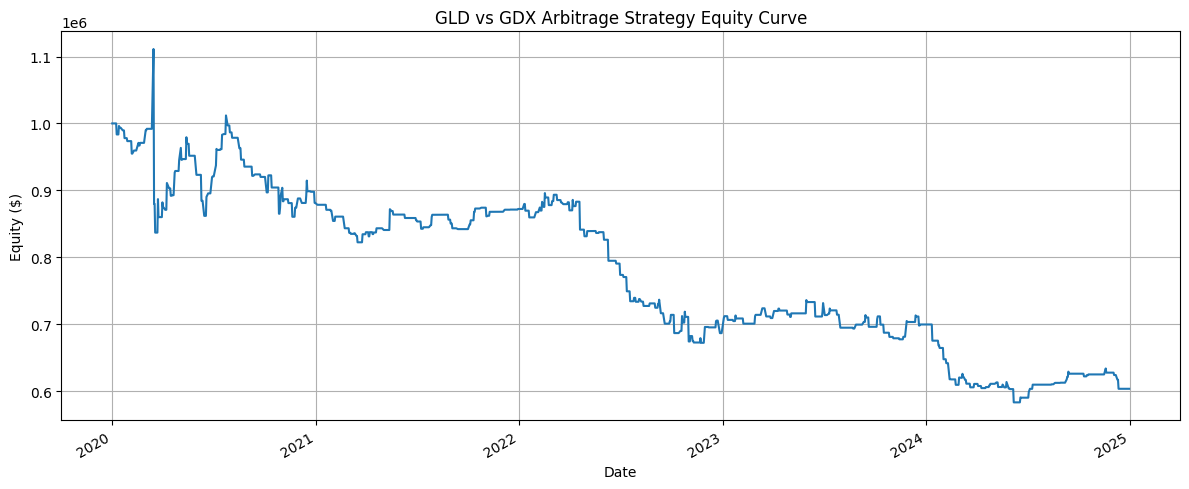


--- GLD vs GDX Strategy Performance ---
Final Equity: $603,325.17
CAGR: -9.63%
Sharpe Ratio: -0.54
Max Drawdown: -47.53%


In [ ]:
# gld_gdx_arbitrage.py

"""
GLD vs GDX Pair Arbitrage Strategy
----------------------------------
Objective:
    Exploit short-term lag between GLD (Gold Spot ETF) and GDX (Gold Miners ETF)
    by detecting GLD gap-ups and delayed GDX response.

Mechanics:
    - Entry: GLD gaps up > threshold and GDX lags
    - Trade: Buy GLD, short GDX (1-day hold)
    - Capital: $1,000,000
    - Exit: Close all positions next day
"""

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# CONFIG
# -----------------------------
START_DATE = "2020-01-01"
END_DATE = "2024-12-31"
CAPITAL = 1_000_000
GLD_TICKER = "GLD"
GDX_TICKER = "GDX"
GLD_GAP_THRESHOLD = 0.01  # 1% gap up

# -----------------------------
# Load Data
# -----------------------------
def load_data():
    tickers = [GLD_TICKER, GDX_TICKER]
    df = yf.download(tickers, start=START_DATE, end=END_DATE)
    df = df['Close'].dropna()

    df.columns = ['GLD', 'GDX']
    return df

# -----------------------------
# Generate Signals
# -----------------------------
def generate_signals(df):
    df['GLD_Gap'] = (df['GLD'] / df['GLD'].shift(1)) - 1
    df['GDX_Lag'] = (df['GDX'] / df['GDX'].shift(1)) - 1

    # Signal: GLD gaps up but GDX does not follow
    df['Signal'] = np.where((df['GLD_Gap'] > GLD_GAP_THRESHOLD) & (df['GDX_Lag'] < df['GLD_Gap'] / 2), 1, 0)
    return df

# -----------------------------
# Backtest Logic
# -----------------------------
def backtest(df):
    df['GLD_Next'] = df['GLD'].shift(-1)
    df['GDX_Next'] = df['GDX'].shift(-1)

    gl_ret = (df['GLD_Next'] - df['GLD']) / df['GLD']
    gd_ret = (df['GDX_Next'] - df['GDX']) / df['GDX']

    # Long GLD, Short GDX
    df['Daily_Return'] = df['Signal'] * (gl_ret - gd_ret)
    df['Equity'] = CAPITAL * (1 + df['Daily_Return'].fillna(0)).cumprod()
    return df

# -----------------------------
# Plot Results
# -----------------------------
def plot_equity(df):
    plt.figure(figsize=(12, 5))
    df['Equity'].plot(title="GLD vs GDX Arbitrage Strategy Equity Curve")
    plt.ylabel("Equity ($)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -----------------------------
# Report Performance
# -----------------------------
def report_performance(df):
    daily_ret = df['Daily_Return'].dropna()
    sharpe = daily_ret.mean() / daily_ret.std() * np.sqrt(252)
    cagr = (df['Equity'].iloc[-1] / CAPITAL) ** (1 / (len(df)/252)) - 1
    max_dd = (df['Equity'] / df['Equity'].cummax() - 1).min()

    print("\n--- GLD vs GDX Strategy Performance ---")
    print(f"Final Equity: ${df['Equity'].iloc[-1]:,.2f}")
    print(f"CAGR: {cagr:.2%}")
    print(f"Sharpe Ratio: {sharpe:.2f}")
    print(f"Max Drawdown: {max_dd:.2%}")

# -----------------------------
# Main
# -----------------------------
if __name__ == "__main__":
    df = load_data()
    df = generate_signals(df)
    df = backtest(df)
    plot_equity(df)
    report_performance(df)


In [ ]:
pip install ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=761f1ea13ca769d255ce19bc7e9fe2d66e6d78adcb58480628fa8787e1bc8dec
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


[*********************100%***********************]  2 of 2 completed
<ipython-input-5-5200965c2d6a>:103: RuntimeWarning: invalid value encountered in scalar divide
  sharpe = ret.mean() / ret.std() * np.sqrt(252)


Final Equity: $1,000,000.00
CAGR: 0.00%  Sharpe: nan  Max DD: 0.00%


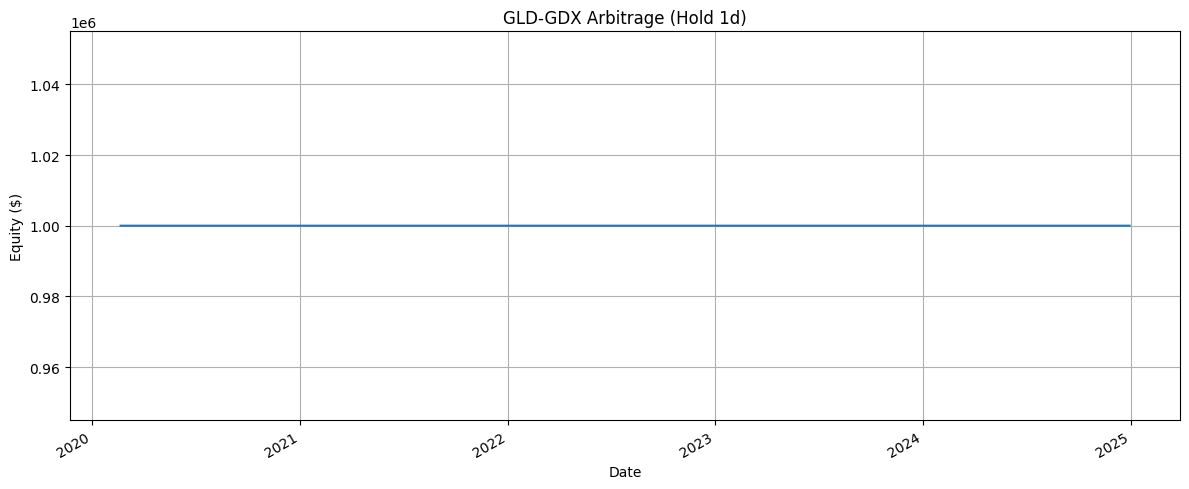

<ipython-input-5-5200965c2d6a>:103: RuntimeWarning: invalid value encountered in scalar divide
  sharpe = ret.mean() / ret.std() * np.sqrt(252)


Final Equity: $1,000,000.00
CAGR: 0.00%  Sharpe: nan  Max DD: 0.00%


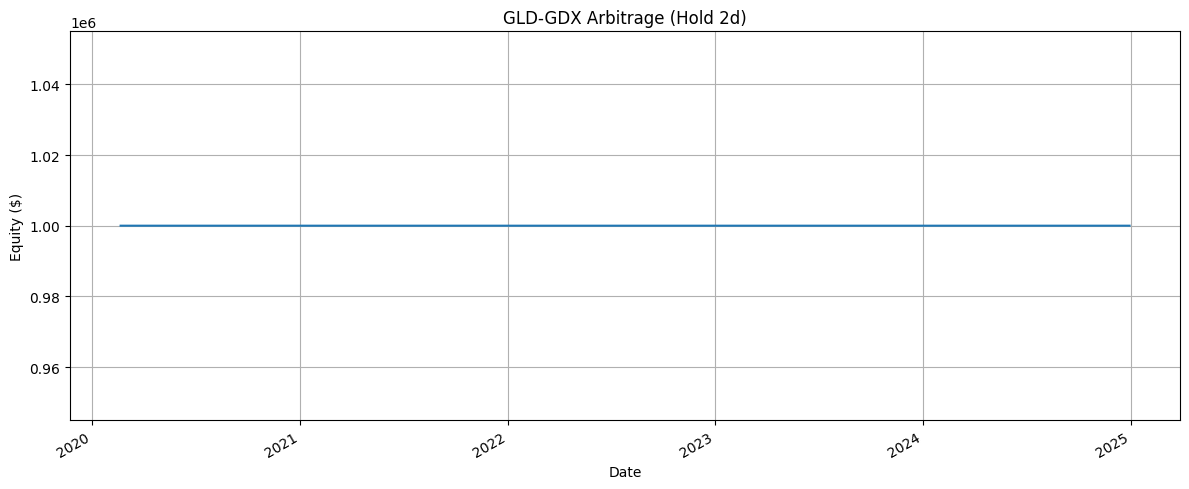

<ipython-input-5-5200965c2d6a>:103: RuntimeWarning: invalid value encountered in scalar divide
  sharpe = ret.mean() / ret.std() * np.sqrt(252)


Final Equity: $1,000,000.00
CAGR: 0.00%  Sharpe: nan  Max DD: 0.00%


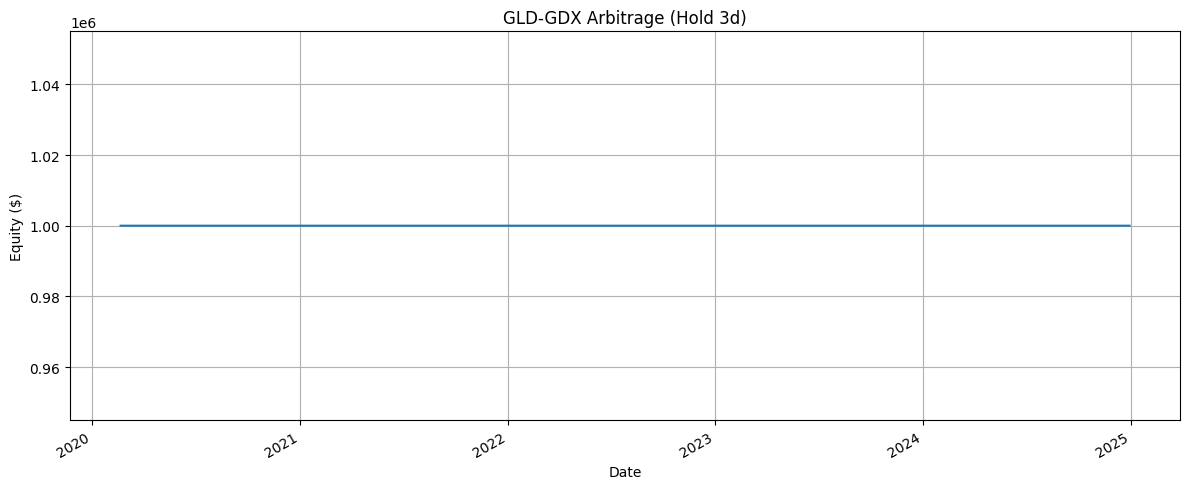

<ipython-input-5-5200965c2d6a>:103: RuntimeWarning: invalid value encountered in scalar divide
  sharpe = ret.mean() / ret.std() * np.sqrt(252)


Final Equity: $1,000,000.00
CAGR: 0.00%  Sharpe: nan  Max DD: 0.00%


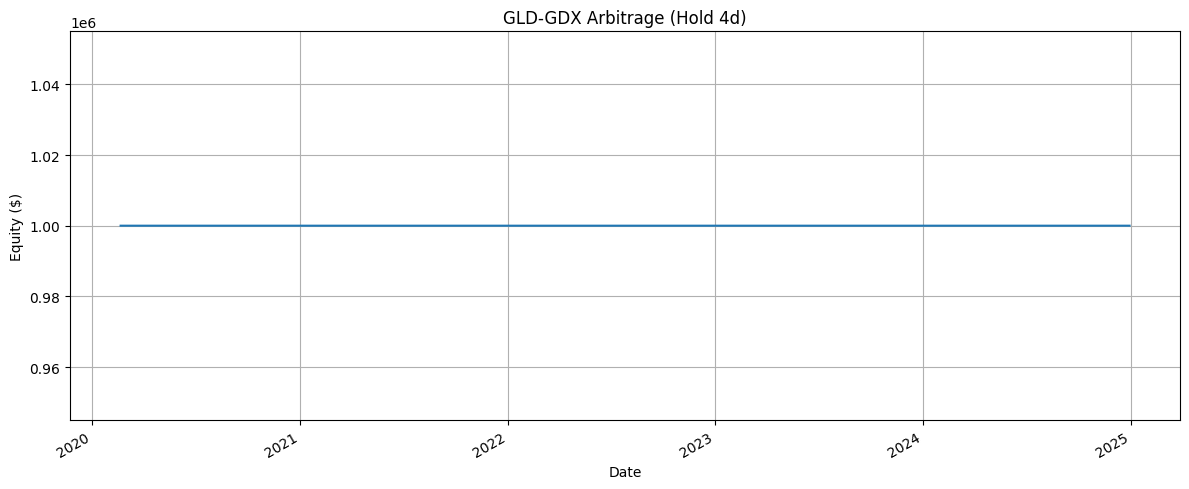

<ipython-input-5-5200965c2d6a>:103: RuntimeWarning: invalid value encountered in scalar divide
  sharpe = ret.mean() / ret.std() * np.sqrt(252)


Final Equity: $1,000,000.00
CAGR: 0.00%  Sharpe: nan  Max DD: 0.00%


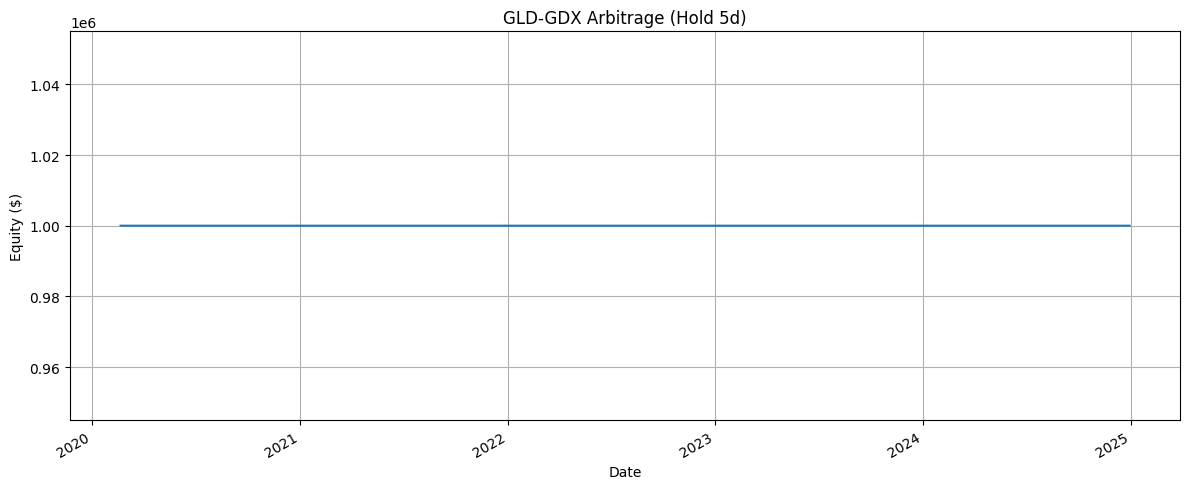


--- Holding Period Sweep Results ---
1 day(s) -> CAGR: 0.00%, Sharpe: nan, Max DD: 0.00%
2 day(s) -> CAGR: 0.00%, Sharpe: nan, Max DD: 0.00%
3 day(s) -> CAGR: 0.00%, Sharpe: nan, Max DD: 0.00%
4 day(s) -> CAGR: 0.00%, Sharpe: nan, Max DD: 0.00%
5 day(s) -> CAGR: 0.00%, Sharpe: nan, Max DD: 0.00%


In [ ]:
# gld_gdx_arbitrage_v2.py

"""
GLD vs GDX Arbitrage Strategy v2
--------------------------------
Features:
  - Backtest period: 2020-01-01 to 2024-12-31
  - Signal logic: GLD gap + GDX lag, with volume and MACD confirmation
  - Holding period sweep: 1 to 5 days
  - Volatility-based position sizing (optional)
  - Metrics: Sharpe, CAGR, Max Drawdown
"""

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator, StochasticOscillator
from ta.trend import MACD

START_DATE = "2020-01-01"
END_DATE = "2024-12-31"
CAPITAL = 1_000_000
GLD_TICKER = "GLD"
GDX_TICKER = "GDX"
GAP_THRESHOLD = 0.02  # 2% gap
VOLUME_MULTIPLIER = 1.5
USE_VOL_SIZING = True

# -----------------------------
# Load Data
# -----------------------------
def load_data():
    df = yf.download([GLD_TICKER, GDX_TICKER], start=START_DATE, end=END_DATE)
    price = df['Close'].dropna()
    vol = df['Volume'].dropna()
    price.columns = ['GLD', 'GDX']
    vol.columns = ['GLD_vol', 'GDX_vol']
    df = price.join(vol)
    df['GLD_ret'] = df['GLD'].pct_change()
    df['GDX_ret'] = df['GDX'].pct_change()
    df['GLD_gap'] = df['GLD'].pct_change()
    df['RVOL'] = df['GLD_vol'] / df['GLD_vol'].rolling(20).mean()
    df['GLD_volatility'] = df['GLD_ret'].rolling(20).std()
    df['GDX_volatility'] = df['GDX_ret'].rolling(20).std()

    # MACD + RSI
    macd = MACD(close=df['GLD']).macd_diff()
    df['MACD'] = macd
    df['GLD_RSI'] = RSIIndicator(close=df['GLD']).rsi()
    df['GDX_RSI'] = RSIIndicator(close=df['GDX']).rsi()
    return df.dropna()

# -----------------------------
# Generate Signals
# -----------------------------
def generate_signals(df):
    signal = (
        (df['GLD_gap'] > GAP_THRESHOLD) &
        (df['GDX_ret'] < df['GLD_ret'] / 2) &
        (df['RVOL'] > VOLUME_MULTIPLIER) &
        (df['MACD'] > 0) &
        (df['GLD_RSI'] > 60) &
        (df['GDX_RSI'] < 55)
    )
    df['Signal'] = signal.astype(int)
    return df

# -----------------------------
# Backtest Engine
# -----------------------------
def backtest(df, hold_days=1):
    df = df.copy()
    df['Strategy_Return'] = 0.0

    for i in range(len(df) - hold_days):
        if df['Signal'].iloc[i] == 1:
            gl_entry = df['GLD'].iloc[i]
            gd_entry = df['GDX'].iloc[i]
            gl_exit = df['GLD'].iloc[i + hold_days]
            gd_exit = df['GDX'].iloc[i + hold_days]

            gl_ret = (gl_exit - gl_entry) / gl_entry
            gd_ret = (gd_exit - gd_entry) / gd_entry

            net_ret = gl_ret - gd_ret  # long GLD, short GDX

            if USE_VOL_SIZING:
                scale = 1 / (df['GLD_volatility'].iloc[i] + df['GDX_volatility'].iloc[i])
            else:
                scale = 1

            df.loc[df.index[i + hold_days], 'Strategy_Return'] += net_ret * scale

    df['Equity'] = CAPITAL * (1 + df['Strategy_Return'].fillna(0)).cumprod()
    return df

# -----------------------------
# Evaluate Strategy
# -----------------------------
def evaluate(df):
    ret = df['Strategy_Return'].dropna()
    sharpe = ret.mean() / ret.std() * np.sqrt(252)
    cagr = (df['Equity'].iloc[-1] / CAPITAL) ** (1 / (len(df)/252)) - 1
    max_dd = (df['Equity'] / df['Equity'].cummax() - 1).min()
    print(f"Final Equity: ${df['Equity'].iloc[-1]:,.2f}")
    print(f"CAGR: {cagr:.2%}  Sharpe: {sharpe:.2f}  Max DD: {max_dd:.2%}")
    return cagr, sharpe, max_dd

# -----------------------------
# Plot Equity
# -----------------------------
def plot_equity(df, title):
    df['Equity'].plot(figsize=(12, 5), title=title)
    plt.ylabel("Equity ($)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -----------------------------
# Main Execution
# -----------------------------
if __name__ == "__main__":
    df = load_data()
    df = generate_signals(df)

    results = []
    for hold in range(1, 6):
        df_bt = backtest(df, hold_days=hold)
        cagr, sharpe, max_dd = evaluate(df_bt)
        results.append((hold, cagr, sharpe, max_dd))
        plot_equity(df_bt, title=f"GLD-GDX Arbitrage (Hold {hold}d)")

    print("\n--- Holding Period Sweep Results ---")
    for hold, cagr, sharpe, max_dd in results:
        print(f"{hold} day(s) -> CAGR: {cagr:.2%}, Sharpe: {sharpe:.2f}, Max DD: {max_dd:.2%}")


[*********************100%***********************]  2 of 2 completed


🔎 Total signals found: 83
Final Equity: $0.01
CAGR: -97.79%  Sharpe: -0.33  Max DD: -114.67%


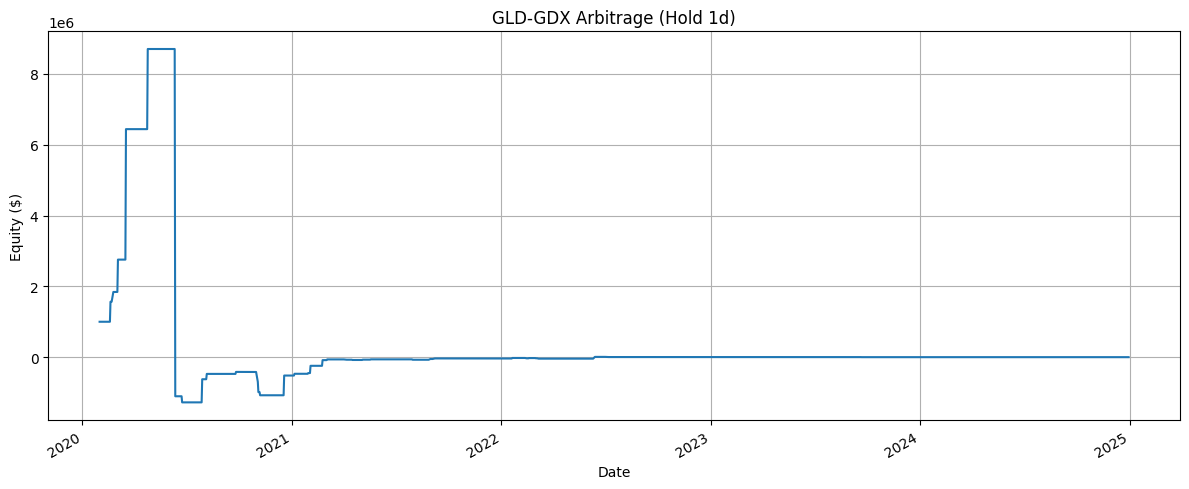

<ipython-input-6-02c7415807b7>:89: RuntimeWarning: invalid value encountered in scalar power
  cagr = (df['Equity'].iloc[-1] / CAPITAL) ** (1 / (len(df)/252)) - 1


Final Equity: $-0.02
CAGR: nan%  Sharpe: -0.23  Max DD: -135.28%


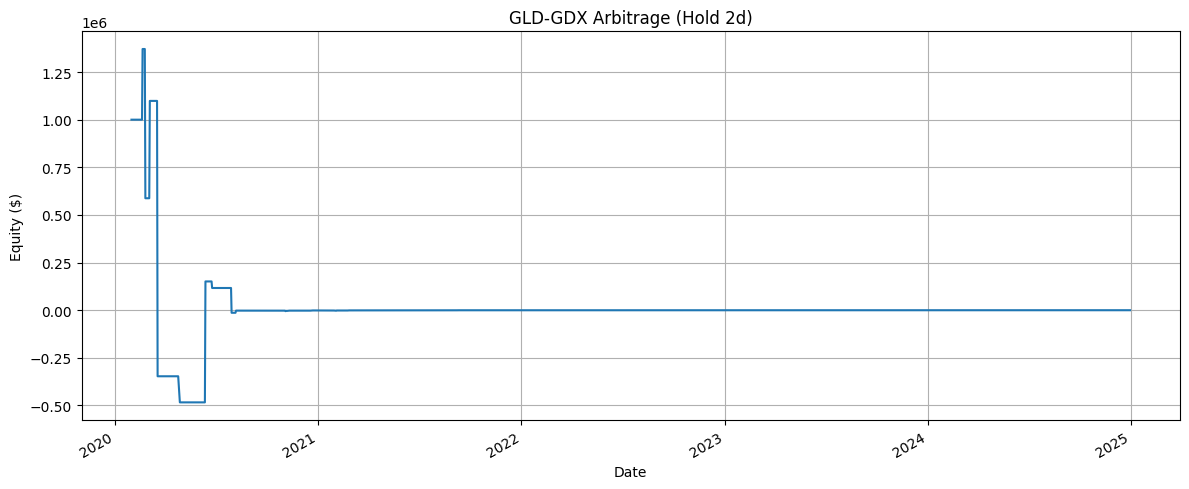

Final Equity: $12.82
CAGR: -89.92%  Sharpe: -0.13  Max DD: -107.90%


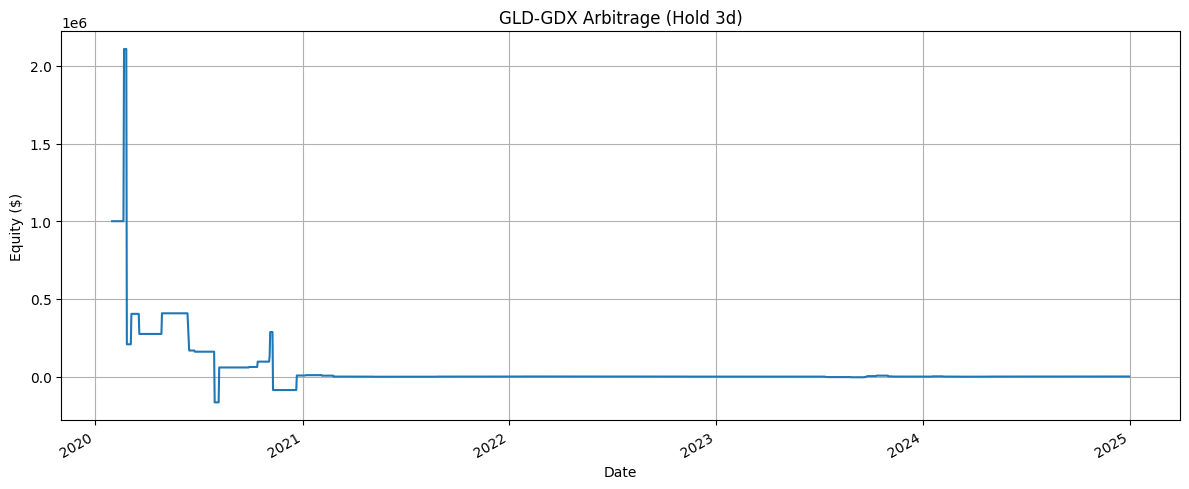

Final Equity: $26.68
CAGR: -88.30%  Sharpe: -0.26  Max DD: -464.97%


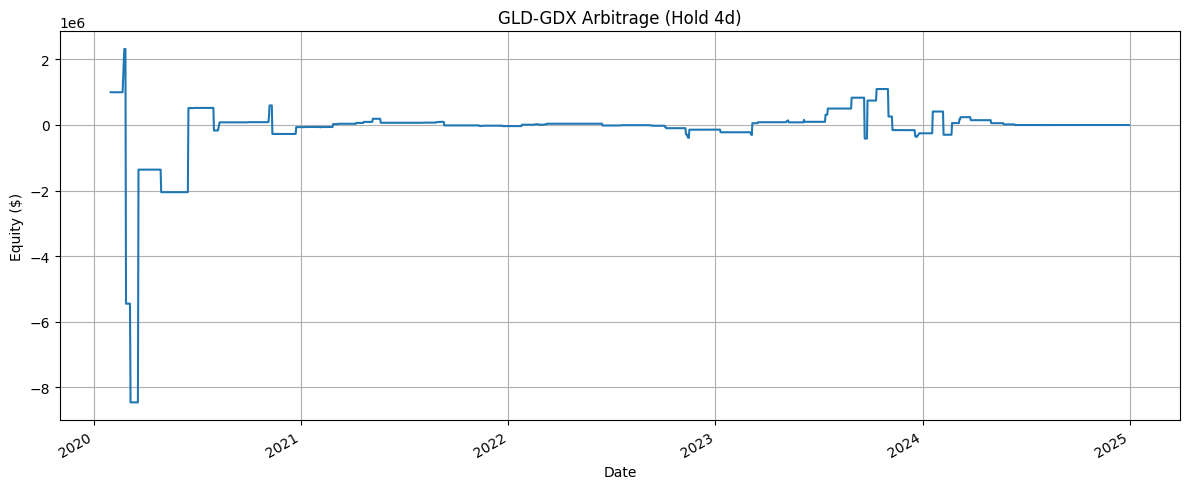

Final Equity: $20,932.00
CAGR: -54.51%  Sharpe: -0.69  Max DD: -450.97%


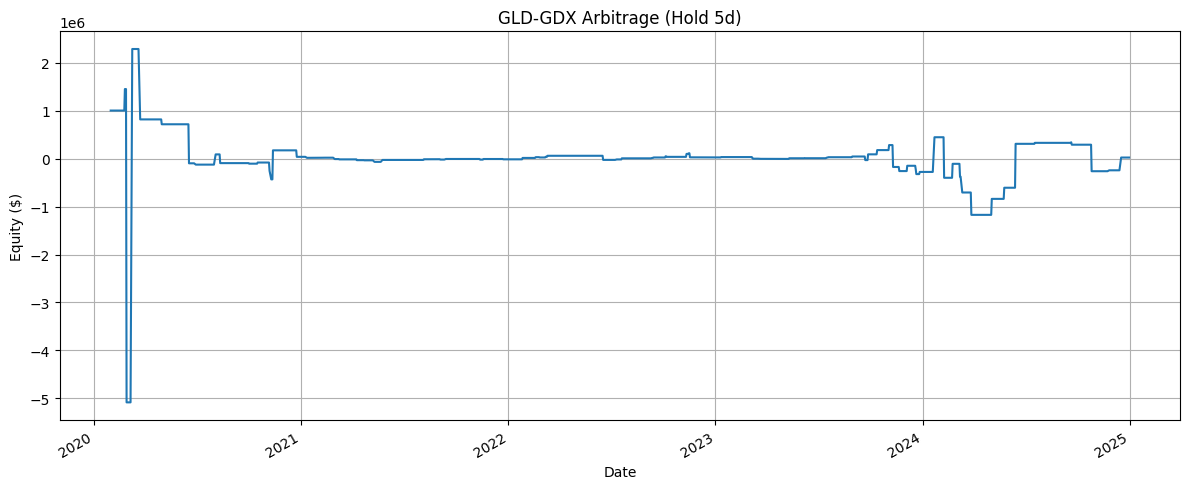


--- Holding Period Sweep Results ---
1 day(s) -> CAGR: -97.79%, Sharpe: -0.33, Max DD: -114.67%
2 day(s) -> CAGR: nan%, Sharpe: -0.23, Max DD: -135.28%
3 day(s) -> CAGR: -89.92%, Sharpe: -0.13, Max DD: -107.90%
4 day(s) -> CAGR: -88.30%, Sharpe: -0.26, Max DD: -464.97%
5 day(s) -> CAGR: -54.51%, Sharpe: -0.69, Max DD: -450.97%


In [ ]:
# gld_gdx_arbitrage_v2.py

"""
GLD vs GDX Arbitrage Strategy v2 (Relaxed Filters)
--------------------------------------------------
Features:
  - Backtest period: 2020-01-01 to 2024-12-31
  - Signal logic: GLD gap + GDX lag + optional volume confirmation
  - Holding period sweep: 1 to 5 days
  - Volatility-based position sizing (optional)
  - Logs number of signal days
  - Metrics: Sharpe, CAGR, Max Drawdown
"""

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

START_DATE = "2020-01-01"
END_DATE = "2024-12-31"
CAPITAL = 1_000_000
GLD_TICKER = "GLD"
GDX_TICKER = "GDX"
GAP_THRESHOLD = 0.01  # 1% gap
VOLUME_MULTIPLIER = 1.2
USE_VOL_SIZING = True

# -----------------------------
# Load Data
# -----------------------------
def load_data():
    df = yf.download([GLD_TICKER, GDX_TICKER], start=START_DATE, end=END_DATE)
    price = df['Close'].dropna()
    vol = df['Volume'].dropna()
    price.columns = ['GLD', 'GDX']
    vol.columns = ['GLD_vol', 'GDX_vol']
    df = price.join(vol)
    df['GLD_ret'] = df['GLD'].pct_change()
    df['GDX_ret'] = df['GDX'].pct_change()
    df['GLD_gap'] = df['GLD'].pct_change()
    df['RVOL'] = df['GLD_vol'] / df['GLD_vol'].rolling(20).mean()
    df['GLD_volatility'] = df['GLD_ret'].rolling(20).std()
    df['GDX_volatility'] = df['GDX_ret'].rolling(20).std()
    return df.dropna()

# -----------------------------
# Generate Signals (Relaxed)
# -----------------------------
def generate_signals(df):
    signal = (
        (df['GLD_gap'] > GAP_THRESHOLD) &
        (df['GDX_ret'] < df['GLD_ret'] / 2) &
        (df['RVOL'] > VOLUME_MULTIPLIER)
    )
    df['Signal'] = signal.astype(int)
    print(f"🔎 Total signals found: {df['Signal'].sum()}")
    return df

# -----------------------------
# Backtest Engine
# -----------------------------
def backtest(df, hold_days=1):
    df = df.copy()
    df['Strategy_Return'] = 0.0
    for i in range(len(df) - hold_days):
        if df['Signal'].iloc[i] == 1:
            gl_entry = df['GLD'].iloc[i]
            gd_entry = df['GDX'].iloc[i]
            gl_exit = df['GLD'].iloc[i + hold_days]
            gd_exit = df['GDX'].iloc[i + hold_days]
            gl_ret = (gl_exit - gl_entry) / gl_entry
            gd_ret = (gd_exit - gd_entry) / gd_entry
            net_ret = gl_ret - gd_ret
            if USE_VOL_SIZING:
                scale = 1 / (df['GLD_volatility'].iloc[i] + df['GDX_volatility'].iloc[i])
            else:
                scale = 1
            df.loc[df.index[i + hold_days], 'Strategy_Return'] += net_ret * scale
    df['Equity'] = CAPITAL * (1 + df['Strategy_Return'].fillna(0)).cumprod()
    return df

# -----------------------------
# Evaluate Strategy
# -----------------------------
def evaluate(df):
    ret = df['Strategy_Return'].dropna()
    sharpe = ret.mean() / ret.std() * np.sqrt(252) if ret.std() > 0 else 0
    cagr = (df['Equity'].iloc[-1] / CAPITAL) ** (1 / (len(df)/252)) - 1
    max_dd = (df['Equity'] / df['Equity'].cummax() - 1).min()
    print(f"Final Equity: ${df['Equity'].iloc[-1]:,.2f}")
    print(f"CAGR: {cagr:.2%}  Sharpe: {sharpe:.2f}  Max DD: {max_dd:.2%}")
    return cagr, sharpe, max_dd

# -----------------------------
# Plot Equity
# -----------------------------
def plot_equity(df, title):
    df['Equity'].plot(figsize=(12, 5), title=title)
    plt.ylabel("Equity ($)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -----------------------------
# Main Execution
# -----------------------------
if __name__ == "__main__":
    df = load_data()
    df = generate_signals(df)
    results = []
    for hold in range(1, 6):
        df_bt = backtest(df, hold_days=hold)
        cagr, sharpe, max_dd = evaluate(df_bt)
        results.append((hold, cagr, sharpe, max_dd))
        plot_equity(df_bt, title=f"GLD-GDX Arbitrage (Hold {hold}d)")
    print("\n--- Holding Period Sweep Results ---")
    for hold, cagr, sharpe, max_dd in results:
        print(f"{hold} day(s) -> CAGR: {cagr:.2%}, Sharpe: {sharpe:.2f}, Max DD: {max_dd:.2%}")


[*********************100%***********************]  2 of 2 completed


🔎 Total signals found: 9
Final Equity: $1,269,139.92
CAGR: 4.98%  Sharpe: 0.36  Max DD: -13.99%


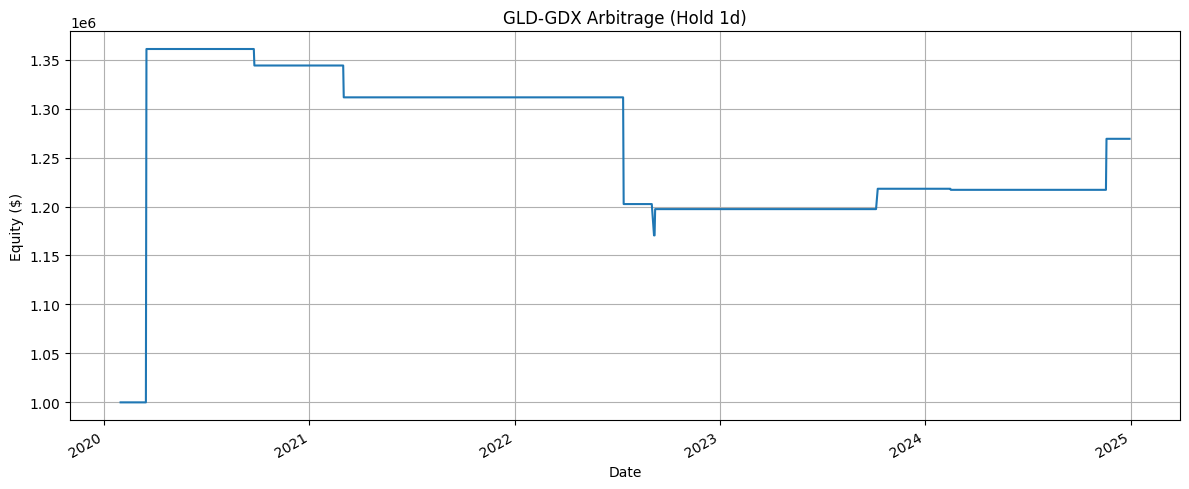

Final Equity: $720,239.02
CAGR: -6.47%  Sharpe: -0.27  Max DD: -41.38%


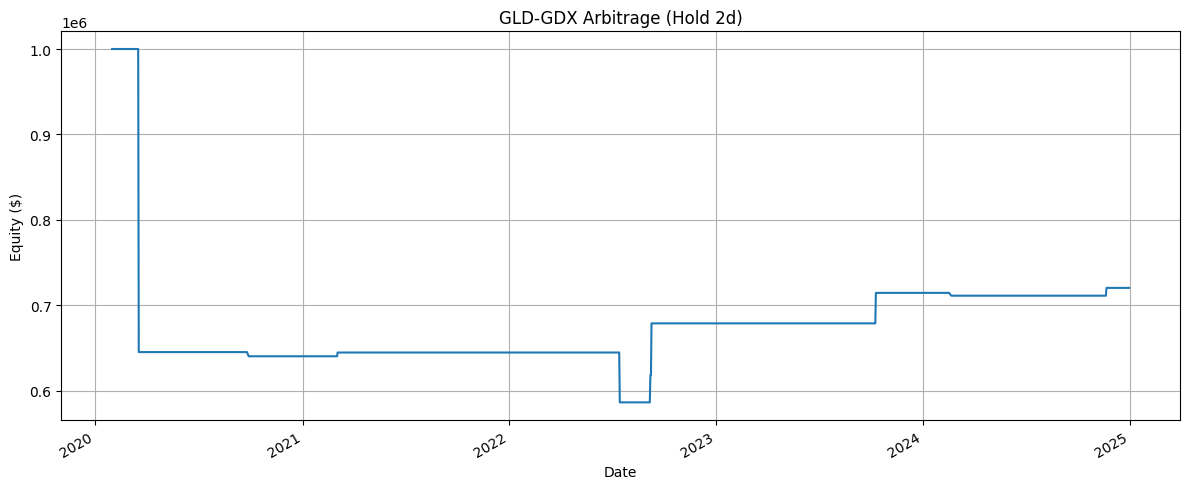

Final Equity: $1,160,280.53
CAGR: 3.07%  Sharpe: 0.36  Max DD: -11.79%


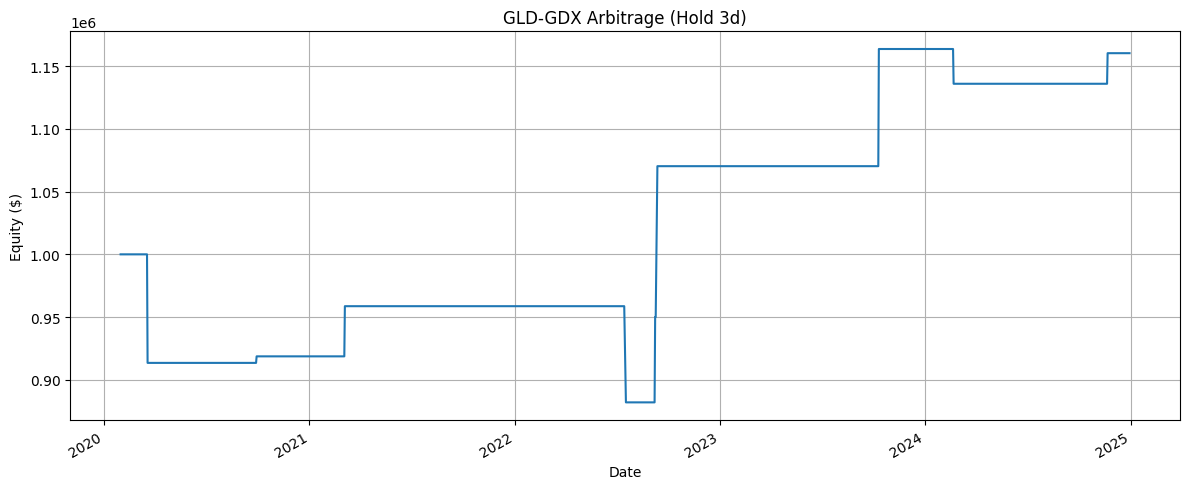

Final Equity: $848,668.67
CAGR: -3.29%  Sharpe: -0.17  Max DD: -23.36%


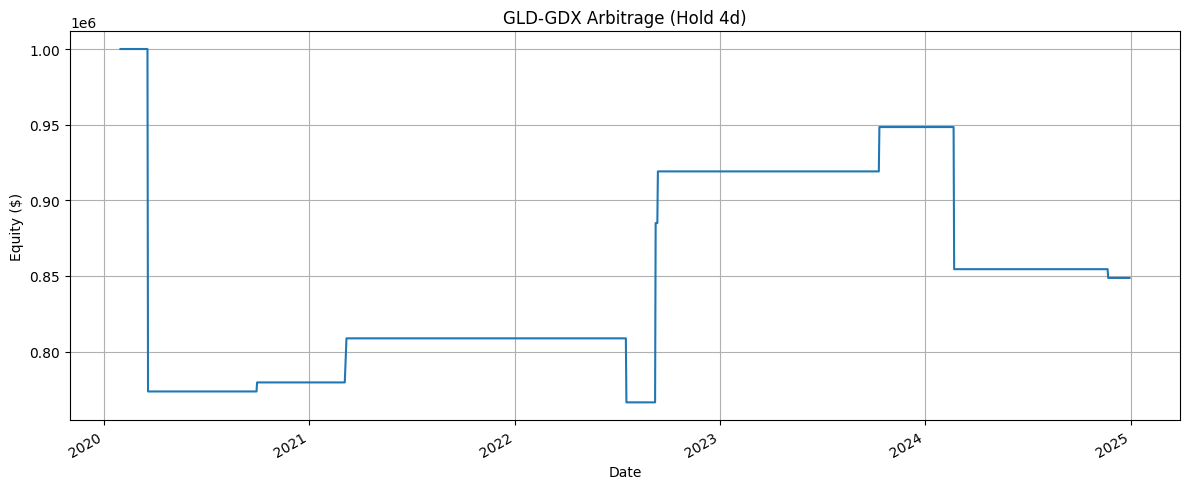

Final Equity: $985,014.67
CAGR: -0.31%  Sharpe: 0.05  Max DD: -20.93%


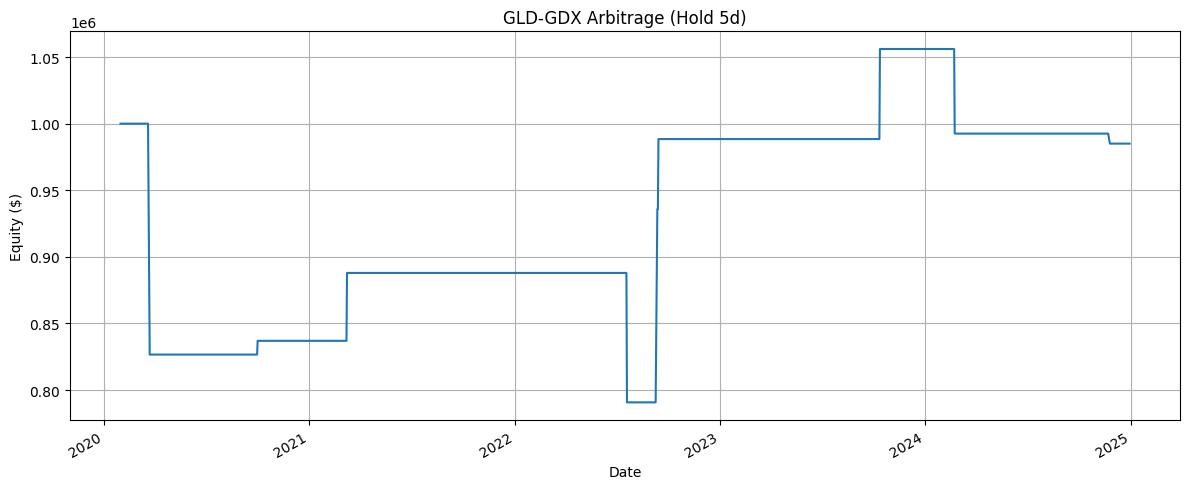


--- Holding Period Sweep Results ---
1 day(s) -> CAGR: 4.98%, Sharpe: 0.36, Max DD: -13.99%
2 day(s) -> CAGR: -6.47%, Sharpe: -0.27, Max DD: -41.38%
3 day(s) -> CAGR: 3.07%, Sharpe: 0.36, Max DD: -11.79%
4 day(s) -> CAGR: -3.29%, Sharpe: -0.17, Max DD: -23.36%
5 day(s) -> CAGR: -0.31%, Sharpe: 0.05, Max DD: -20.93%


In [ ]:
# gld_gdx_arbitrage_v2.py

"""
GLD vs GDX Arbitrage Strategy v2.1 (Debug + Scaling Cap + Trade Log)
---------------------------------------------------------------------
Features:
  - GLD gap + GDX lag + volume filter
  - Holding period sweep (1–5 days)
  - Volatility-based sizing with cap
  - Z-score confirmation (spread-based)
  - Logs individual trades
  - Plots equity and prints metrics
"""

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

START_DATE = "2020-01-01"
END_DATE = "2024-12-31"
CAPITAL = 1_000_000
GLD_TICKER = "GLD"
GDX_TICKER = "GDX"
GAP_THRESHOLD = 0.01
VOLUME_MULTIPLIER = 1.2
USE_VOL_SIZING = True
MAX_LEVERAGE = 3

# -----------------------------
# Load Data
# -----------------------------
def load_data():
    df = yf.download([GLD_TICKER, GDX_TICKER], start=START_DATE, end=END_DATE)
    price = df['Close'].dropna()
    vol = df['Volume'].dropna()
    price.columns = ['GLD', 'GDX']
    vol.columns = ['GLD_vol', 'GDX_vol']
    df = price.join(vol)
    df['GLD_ret'] = df['GLD'].pct_change()
    df['GDX_ret'] = df['GDX'].pct_change()
    df['GLD_gap'] = df['GLD'].pct_change()
    df['RVOL'] = df['GLD_vol'] / df['GLD_vol'].rolling(20).mean()
    df['Spread'] = df['GLD'] - df['GDX']
    df['ZScore'] = (df['Spread'] - df['Spread'].rolling(20).mean()) / df['Spread'].rolling(20).std()
    df['GLD_volatility'] = df['GLD_ret'].rolling(20).std()
    df['GDX_volatility'] = df['GDX_ret'].rolling(20).std()
    return df.dropna()

# -----------------------------
# Generate Signals
# -----------------------------
def generate_signals(df):
    df = df.copy()
    signal = (
        (df['GLD_gap'] > GAP_THRESHOLD) &
        (df['GDX_ret'] < df['GLD_ret'] / 2) &
        (df['RVOL'] > VOLUME_MULTIPLIER) &
        (df['ZScore'] > 1)
    )
    df['Signal'] = signal.astype(int)
    print(f"🔎 Total signals found: {df['Signal'].sum()}")
    return df

# -----------------------------
# Backtest Engine with Trade Log
# -----------------------------
def backtest(df, hold_days=1):
    df = df.copy()
    df['Strategy_Return'] = 0.0
    trades = []
    for i in range(len(df) - hold_days):
        if df['Signal'].iloc[i] == 1:
            gl_entry = df['GLD'].iloc[i]
            gd_entry = df['GDX'].iloc[i]
            gl_exit = df['GLD'].iloc[i + hold_days]
            gd_exit = df['GDX'].iloc[i + hold_days]
            gl_ret = (gl_exit - gl_entry) / gl_entry
            gd_ret = (gd_exit - gd_entry) / gd_entry
            net_ret = gl_ret - gd_ret
            if USE_VOL_SIZING:
                raw_scale = 1 / (df['GLD_volatility'].iloc[i] + df['GDX_volatility'].iloc[i])
                scale = min(raw_scale, MAX_LEVERAGE)
            else:
                scale = 1
            ret = net_ret * scale
            df.loc[df.index[i + hold_days], 'Strategy_Return'] += ret
            trades.append({
                'Entry Date': df.index[i],
                'Exit Date': df.index[i + hold_days],
                'GLD Return': gl_ret,
                'GDX Return': gd_ret,
                'Net Return': net_ret,
                'Scaled Return': ret,
                'Leverage': scale
            })
    df['Equity'] = CAPITAL * (1 + df['Strategy_Return'].fillna(0)).cumprod()
    trade_log = pd.DataFrame(trades)
    return df, trade_log

# -----------------------------
# Evaluate Strategy
# -----------------------------
def evaluate(df):
    ret = df['Strategy_Return'].dropna()
    sharpe = ret.mean() / ret.std() * np.sqrt(252) if ret.std() > 0 else 0
    cagr = (df['Equity'].iloc[-1] / CAPITAL) ** (1 / (len(df)/252)) - 1
    max_dd = (df['Equity'] / df['Equity'].cummax() - 1).min()
    print(f"Final Equity: ${df['Equity'].iloc[-1]:,.2f}")
    print(f"CAGR: {cagr:.2%}  Sharpe: {sharpe:.2f}  Max DD: {max_dd:.2%}")
    return cagr, sharpe, max_dd

# -----------------------------
# Plot Equity
# -----------------------------
def plot_equity(df, title):
    df['Equity'].plot(figsize=(12, 5), title=title)
    plt.ylabel("Equity ($)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -----------------------------
# Main
# -----------------------------
if __name__ == "__main__":
    df = load_data()
    df = generate_signals(df)
    results = []
    for hold in range(1, 6):
        df_bt, log = backtest(df, hold_days=hold)
        cagr, sharpe, max_dd = evaluate(df_bt)
        results.append((hold, cagr, sharpe, max_dd))
        plot_equity(df_bt, title=f"GLD-GDX Arbitrage (Hold {hold}d)")
        if hold == 1:
            log.to_csv(f"trades_hold{hold}.csv", index=False)
    print("\n--- Holding Period Sweep Results ---")
    for hold, cagr, sharpe, max_dd in results:
        print(f"{hold} day(s) -> CAGR: {cagr:.2%}, Sharpe: {sharpe:.2f}, Max DD: {max_dd:.2%}")


[*********************100%***********************]  2 of 2 completed


🔎 Total signals found: 9
Final Equity: $1,269,139.92
CAGR: 4.98%  Sharpe: 0.36  Max DD: -13.99%


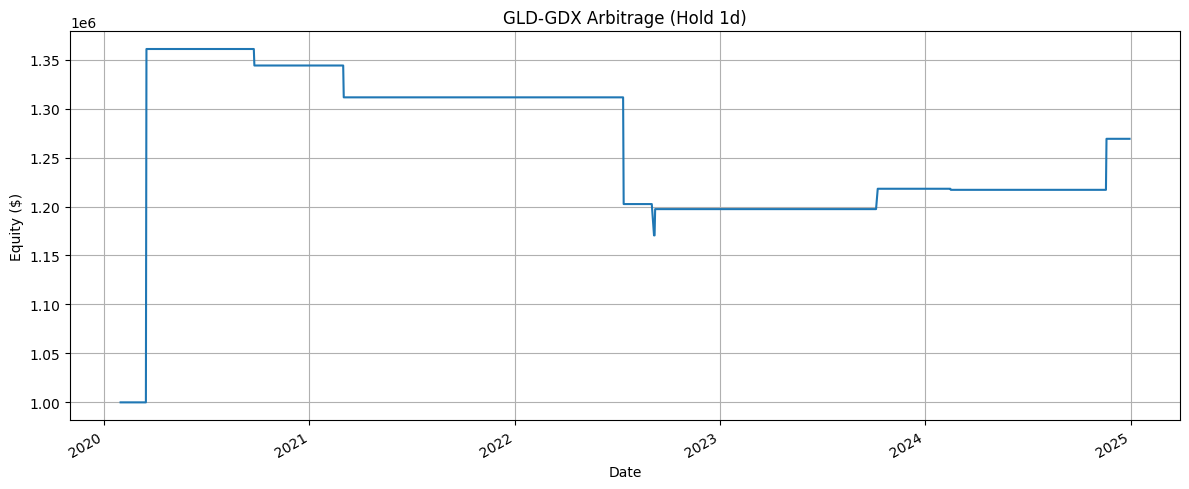

Final Equity: $720,239.02
CAGR: -6.47%  Sharpe: -0.27  Max DD: -41.38%


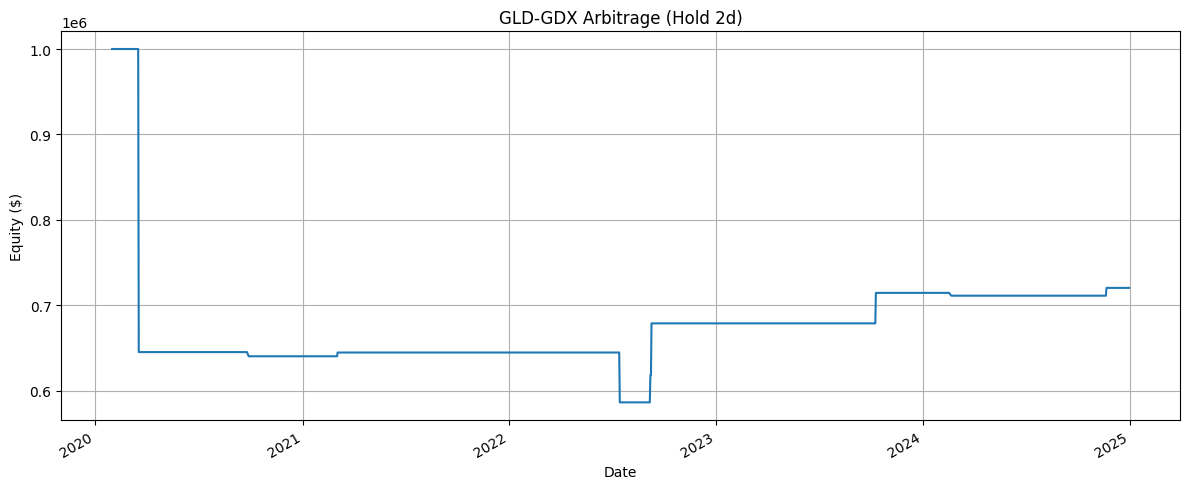

Final Equity: $1,160,280.53
CAGR: 3.07%  Sharpe: 0.36  Max DD: -11.79%


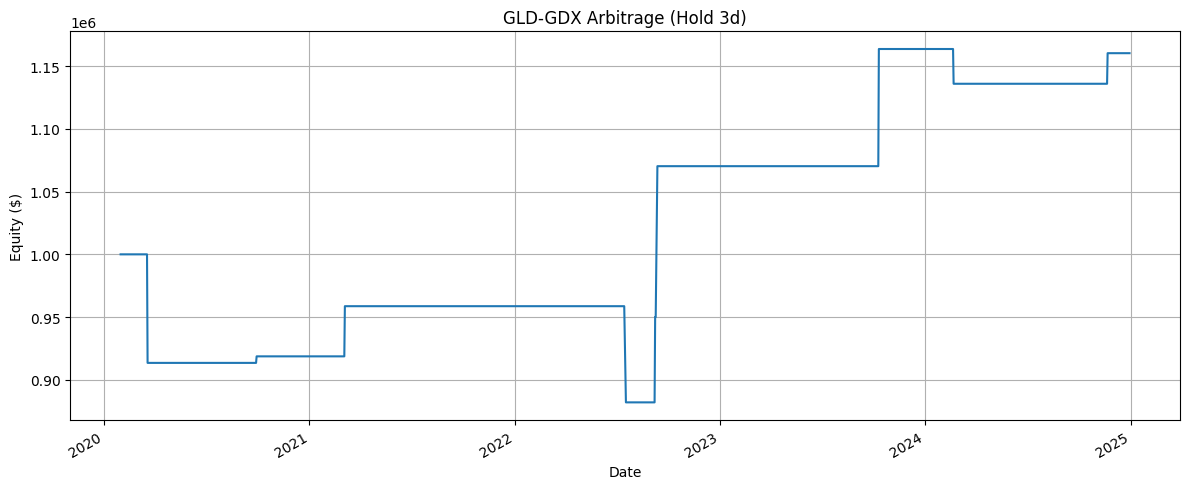

Final Equity: $848,668.67
CAGR: -3.29%  Sharpe: -0.17  Max DD: -23.36%


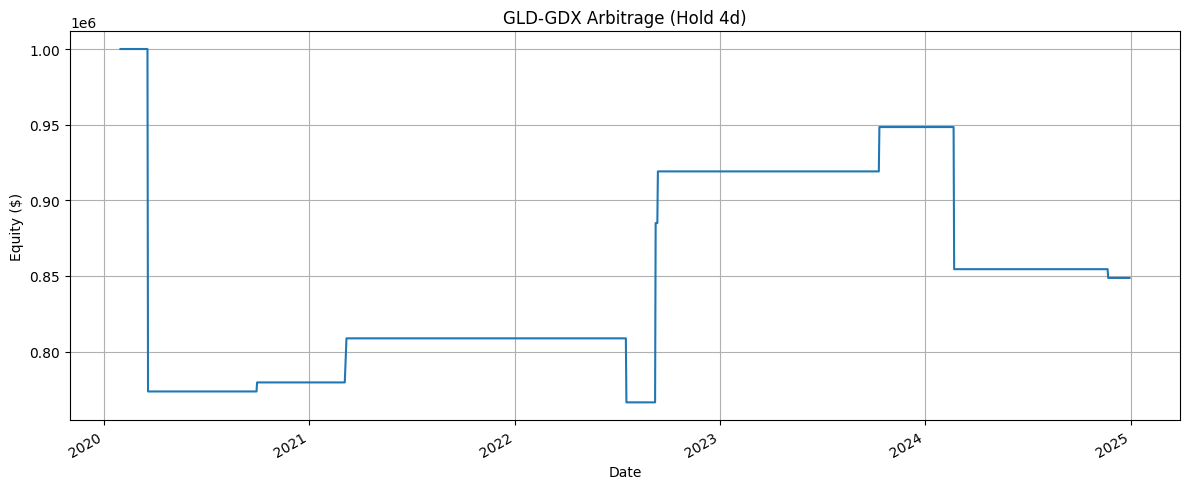

Final Equity: $985,014.67
CAGR: -0.31%  Sharpe: 0.05  Max DD: -20.93%


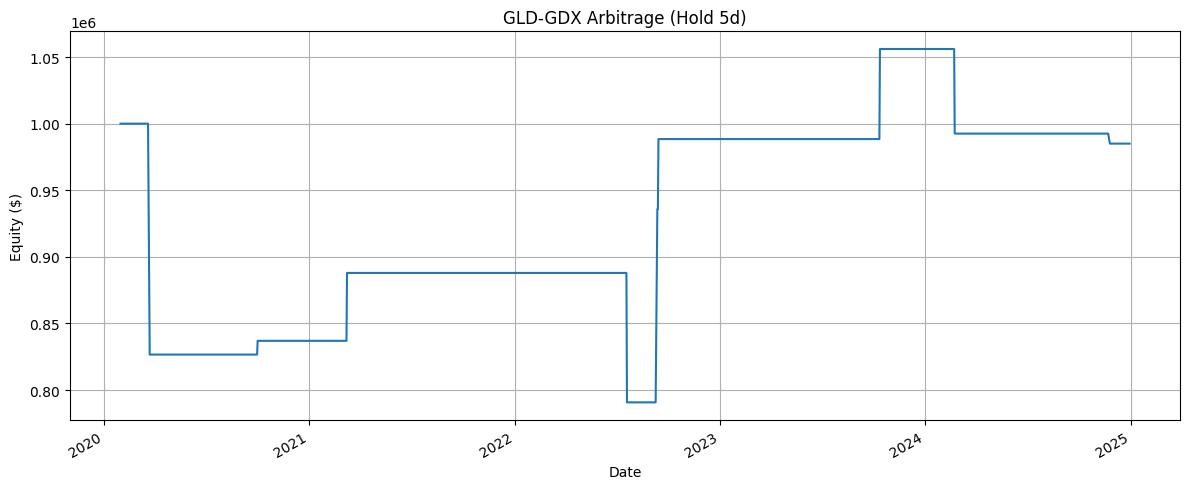


--- Holding Period Sweep Results ---
1 day(s) -> CAGR: 4.98%, Sharpe: 0.36, Max DD: -13.99%
2 day(s) -> CAGR: -6.47%, Sharpe: -0.27, Max DD: -41.38%
3 day(s) -> CAGR: 3.07%, Sharpe: 0.36, Max DD: -11.79%
4 day(s) -> CAGR: -3.29%, Sharpe: -0.17, Max DD: -23.36%
5 day(s) -> CAGR: -0.31%, Sharpe: 0.05, Max DD: -20.93%


In [ ]:
# gld_gdx_arbitrage_v2.py

"""
GLD vs GDX Arbitrage Strategy v2.1 (Debug + Scaling Cap + Trade Log)
---------------------------------------------------------------------
Features:
  - GLD gap + GDX lag + volume filter
  - Holding period sweep (1–5 days)
  - Volatility-based sizing with cap
  - Z-score confirmation (spread-based)
  - Logs individual trades
  - Plots equity and prints metrics
"""

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

START_DATE = "2020-01-01"
END_DATE = "2024-12-31"
CAPITAL = 1_000_000
GLD_TICKER = "GLD"
GDX_TICKER = "GDX"
GAP_THRESHOLD = 0.01
VOLUME_MULTIPLIER = 1.2
USE_VOL_SIZING = True
MAX_LEVERAGE = 3

# -----------------------------
# Load Data
# -----------------------------
def load_data():
    df = yf.download([GLD_TICKER, GDX_TICKER], start=START_DATE, end=END_DATE)
    price = df['Close'].dropna()
    vol = df['Volume'].dropna()
    price.columns = ['GLD', 'GDX']
    vol.columns = ['GLD_vol', 'GDX_vol']
    df = price.join(vol)
    df['GLD_ret'] = df['GLD'].pct_change()
    df['GDX_ret'] = df['GDX'].pct_change()
    df['GLD_gap'] = df['GLD'].pct_change()
    df['RVOL'] = df['GLD_vol'] / df['GLD_vol'].rolling(20).mean()
    df['Spread'] = df['GLD'] - df['GDX']
    df['ZScore'] = (df['Spread'] - df['Spread'].rolling(20).mean()) / df['Spread'].rolling(20).std()
    df['GLD_volatility'] = df['GLD_ret'].rolling(20).std()
    df['GDX_volatility'] = df['GDX_ret'].rolling(20).std()
    return df.dropna()

# -----------------------------
# Generate Signals
# -----------------------------
def generate_signals(df):
    df = df.copy()
    signal = (
        (df['GLD_gap'] > GAP_THRESHOLD) &
        (df['GDX_ret'] < df['GLD_ret'] / 2) &
        (df['RVOL'] > VOLUME_MULTIPLIER) &
        (df['ZScore'] > 1)
    )
    df['Signal'] = signal.astype(int)
    print(f"🔎 Total signals found: {df['Signal'].sum()}")
    return df

# -----------------------------
# Backtest Engine with Trade Log
# -----------------------------
def backtest(df, hold_days=1):
    df = df.copy()
    df['Strategy_Return'] = 0.0
    trades = []
    for i in range(len(df) - hold_days):
        if df['Signal'].iloc[i] == 1:
            gl_entry = df['GLD'].iloc[i]
            gd_entry = df['GDX'].iloc[i]
            gl_exit = df['GLD'].iloc[i + hold_days]
            gd_exit = df['GDX'].iloc[i + hold_days]
            gl_ret = (gl_exit - gl_entry) / gl_entry
            gd_ret = (gd_exit - gd_entry) / gd_entry
            net_ret = gl_ret - gd_ret
            if USE_VOL_SIZING:
                raw_scale = 1 / (df['GLD_volatility'].iloc[i] + df['GDX_volatility'].iloc[i])
                scale = min(raw_scale, MAX_LEVERAGE)
            else:
                scale = 1
            ret = net_ret * scale
            df.loc[df.index[i + hold_days], 'Strategy_Return'] += ret
            trades.append({
                'Entry Date': df.index[i],
                'Exit Date': df.index[i + hold_days],
                'GLD Return': gl_ret,
                'GDX Return': gd_ret,
                'Net Return': net_ret,
                'Scaled Return': ret,
                'Leverage': scale
            })
    df['Equity'] = CAPITAL * (1 + df['Strategy_Return'].fillna(0)).cumprod()
    trade_log = pd.DataFrame(trades)
    return df, trade_log

# -----------------------------
# Evaluate Strategy
# -----------------------------
def evaluate(df):
    ret = df['Strategy_Return'].dropna()
    sharpe = ret.mean() / ret.std() * np.sqrt(252) if ret.std() > 0 else 0
    cagr = (df['Equity'].iloc[-1] / CAPITAL) ** (1 / (len(df)/252)) - 1
    max_dd = (df['Equity'] / df['Equity'].cummax() - 1).min()
    print(f"Final Equity: ${df['Equity'].iloc[-1]:,.2f}")
    print(f"CAGR: {cagr:.2%}  Sharpe: {sharpe:.2f}  Max DD: {max_dd:.2%}")
    return cagr, sharpe, max_dd

# -----------------------------
# Plot Equity
# -----------------------------
def plot_equity(df, title):
    df['Equity'].plot(figsize=(12, 5), title=title)
    plt.ylabel("Equity ($)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -----------------------------
# Auto-Tuning Parameters
# -----------------------------
def auto_tune(df, z_range=[0.5, 1, 1.5], gap_range=[0.005, 0.01, 0.015]):
    best_combo = None
    best_cagr = -np.inf
    for z in z_range:
        for gap in gap_range:
            df['Signal'] = (
                (df['GLD_gap'] > gap) &
                (df['GDX_ret'] < df['GLD_ret'] / 2) &
                (df['RVOL'] > VOLUME_MULTIPLIER) &
                (df['ZScore'] > z)
            ).astype(int)
            df_bt, _ = backtest(df, hold_days=1)
            cagr, _, _ = evaluate(df_bt)
            if cagr > best_cagr:
                best_cagr = cagr
                best_combo = (z, gap)
    print(f"🔍 Best Z-Score: {best_combo[0]}, Best Gap Threshold: {best_combo[1]} → CAGR: {best_cagr:.2%}")
    return best_combo

# -----------------------------
# Volatility Breakout Detector
# -----------------------------
def add_volatility_breakout(df):
    df['GLD_Breakout'] = (df['GLD_ret'].abs() > 2 * df['GLD_ret'].rolling(20).std()).astype(int)
    return df

# -----------------------------
# Risk-Adjusted Allocation Module
# -----------------------------
def compute_risk_allocation(df, base_risk=0.01):
    capital_alloc = []
    for i in range(len(df)):
        vol = df['GLD_volatility'].iloc[i] + df['GDX_volatility'].iloc[i]
        if vol == 0 or np.isnan(vol):
            capital_alloc.append(0)
        else:
            risk = base_risk * CAPITAL
            allocation = min(risk / vol, CAPITAL)
            capital_alloc.append(allocation)
    df['Capital_Allocated'] = capital_alloc
    return df

# -----------------------------
# Main
# -----------------------------
if __name__ == "__main__":
    df = load_data()
    df = generate_signals(df)
    results = []
    for hold in range(1, 6):
        df_bt, log = backtest(df, hold_days=hold)
        cagr, sharpe, max_dd = evaluate(df_bt)
        results.append((hold, cagr, sharpe, max_dd))
        plot_equity(df_bt, title=f"GLD-GDX Arbitrage (Hold {hold}d)")
        if hold == 1:
            log.to_csv(f"trades_hold{hold}.csv", index=False)
    print("\n--- Holding Period Sweep Results ---")
    for hold, cagr, sharpe, max_dd in results:
        print(f"{hold} day(s) -> CAGR: {cagr:.2%}, Sharpe: {sharpe:.2f}, Max DD: {max_dd:.2%}")


[*********************100%***********************]  2 of 2 completed


🔎 Total signals found: 9
Final Equity: $1,269,139.92
CAGR: 4.98%  Sharpe: 0.36  Max DD: -13.99%


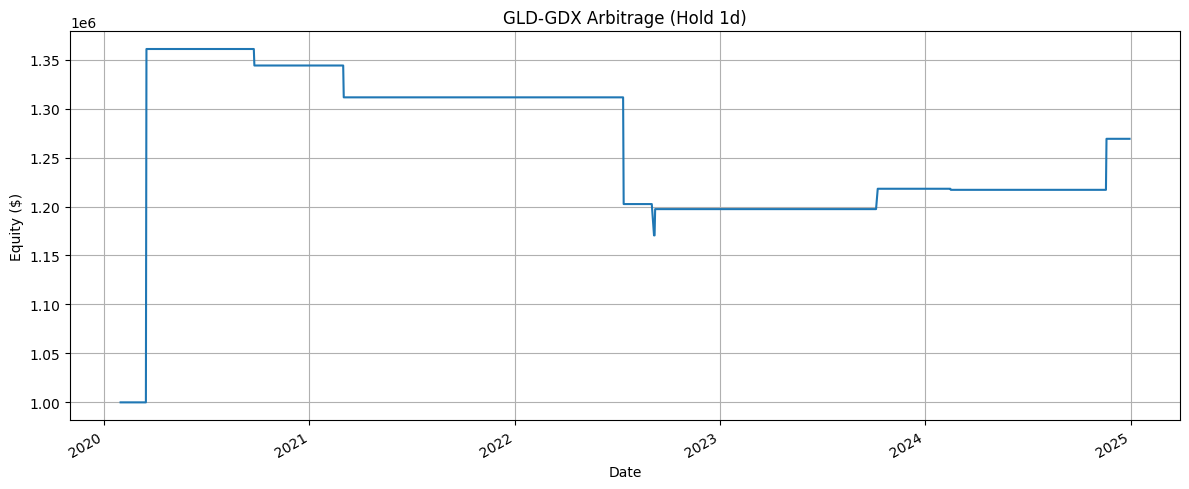

Final Equity: $720,239.02
CAGR: -6.47%  Sharpe: -0.27  Max DD: -41.38%


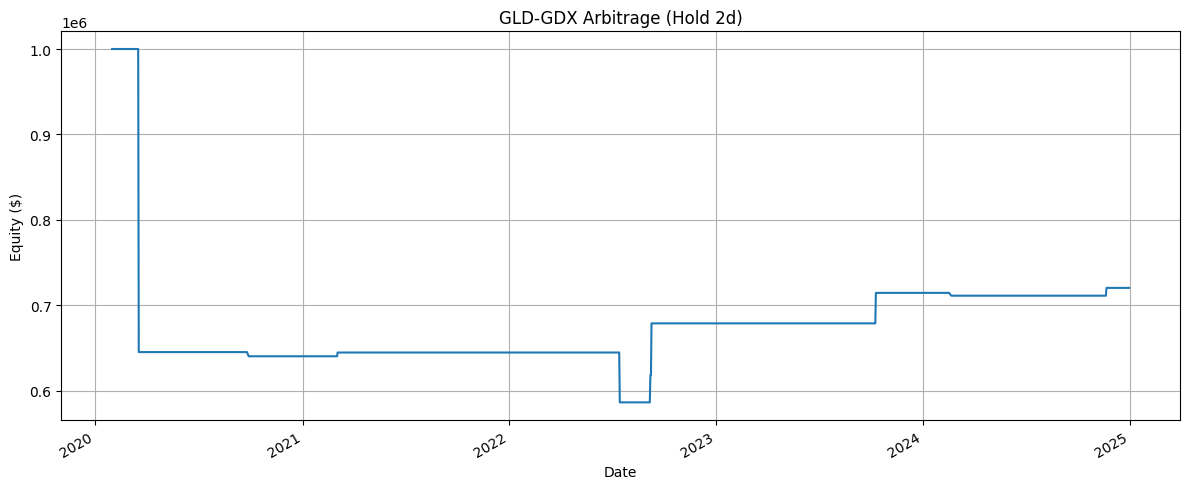

Final Equity: $1,160,280.53
CAGR: 3.07%  Sharpe: 0.36  Max DD: -11.79%


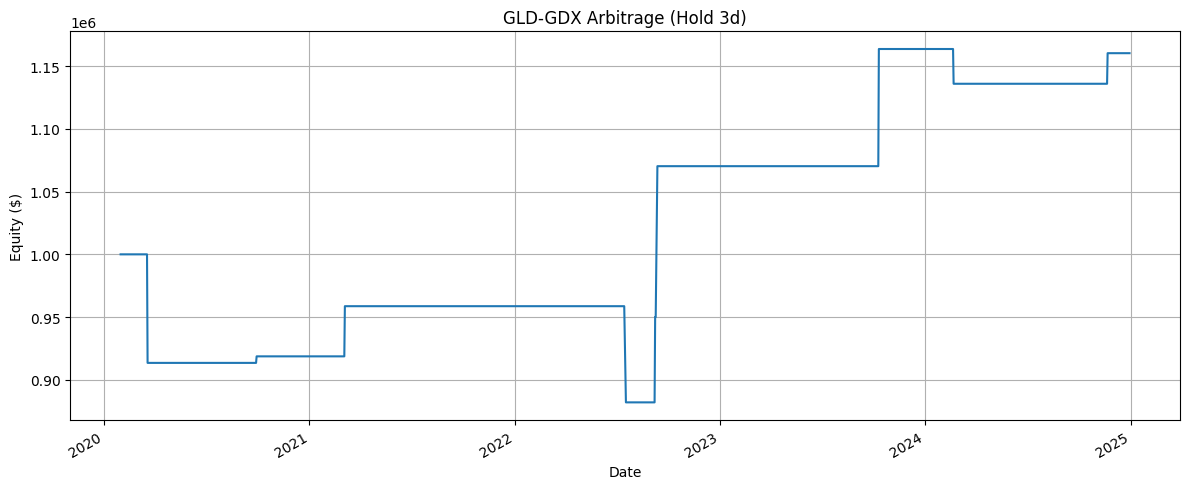

Final Equity: $848,668.67
CAGR: -3.29%  Sharpe: -0.17  Max DD: -23.36%


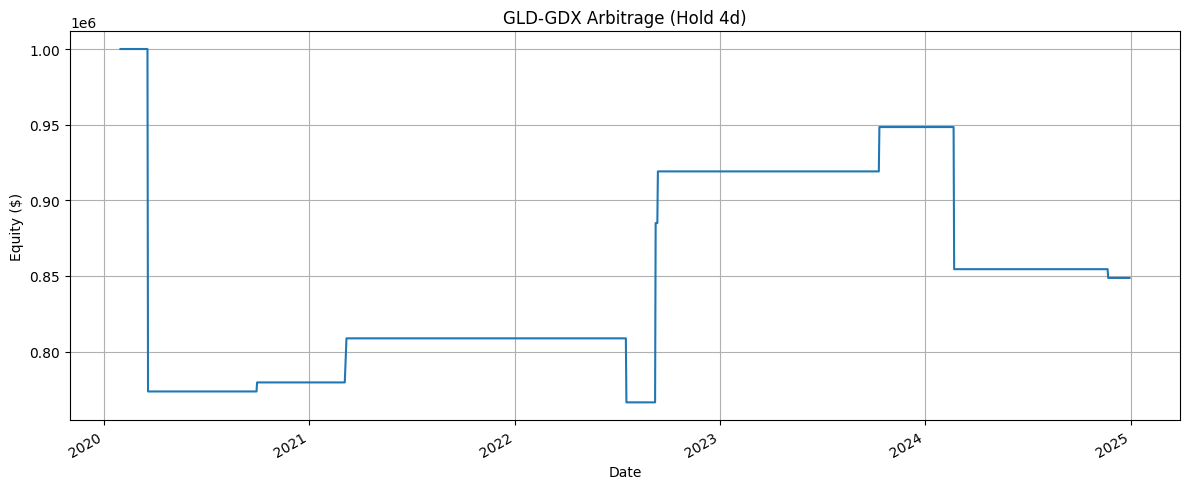

Final Equity: $985,014.67
CAGR: -0.31%  Sharpe: 0.05  Max DD: -20.93%


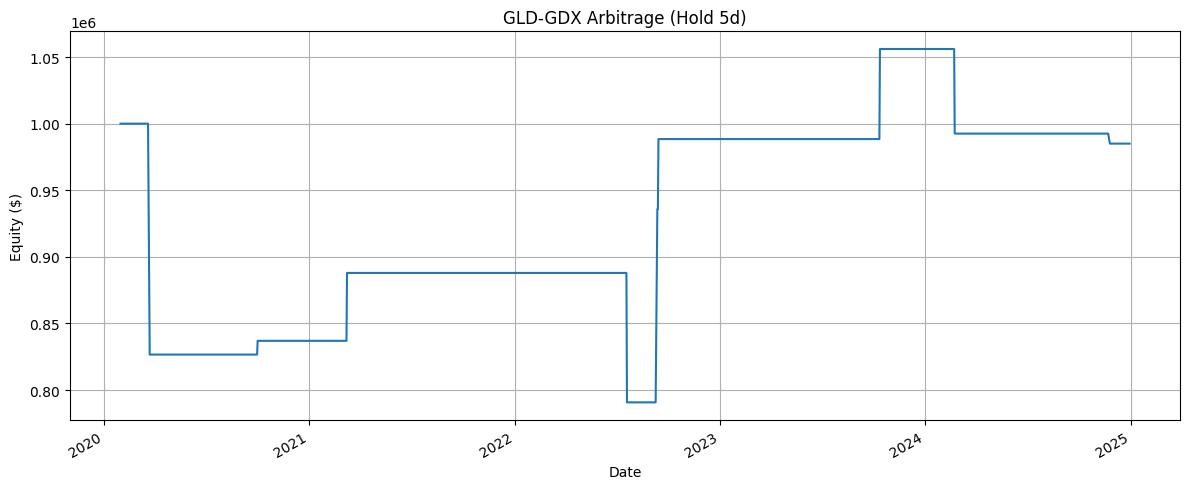


--- Holding Period Sweep Results ---
1 day(s) -> CAGR: 4.98%, Sharpe: 0.36, Max DD: -13.99%
2 day(s) -> CAGR: -6.47%, Sharpe: -0.27, Max DD: -41.38%
3 day(s) -> CAGR: 3.07%, Sharpe: 0.36, Max DD: -11.79%
4 day(s) -> CAGR: -3.29%, Sharpe: -0.17, Max DD: -23.36%
5 day(s) -> CAGR: -0.31%, Sharpe: 0.05, Max DD: -20.93%


In [ ]:
# gld_gdx_arbitrage_v2.py

"""
GLD vs GDX Arbitrage Strategy v2.1 (Debug + Scaling Cap + Trade Log)
---------------------------------------------------------------------
Features:
  - GLD gap + GDX lag + volume filter
  - Holding period sweep (1–5 days)
  - Volatility-based sizing with cap
  - Z-score confirmation (spread-based)
  - Logs individual trades
  - Plots equity and prints metrics
"""

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

START_DATE = "2020-01-01"
END_DATE = "2024-12-31"
CAPITAL = 1_000_000
GLD_TICKER = "GLD"
GDX_TICKER = "GDX"
GAP_THRESHOLD = 0.01
VOLUME_MULTIPLIER = 1.2
USE_VOL_SIZING = True
MAX_LEVERAGE = 3

# -----------------------------
# Load Data
# -----------------------------
def load_data():
    df = yf.download([GLD_TICKER, GDX_TICKER], start=START_DATE, end=END_DATE)
    price = df['Close'].dropna()
    vol = df['Volume'].dropna()
    price.columns = ['GLD', 'GDX']
    vol.columns = ['GLD_vol', 'GDX_vol']
    df = price.join(vol)
    df['GLD_ret'] = df['GLD'].pct_change()
    df['GDX_ret'] = df['GDX'].pct_change()
    df['GLD_gap'] = df['GLD'].pct_change()
    df['RVOL'] = df['GLD_vol'] / df['GLD_vol'].rolling(20).mean()
    df['Spread'] = df['GLD'] - df['GDX']
    df['ZScore'] = (df['Spread'] - df['Spread'].rolling(20).mean()) / df['Spread'].rolling(20).std()
    df['GLD_volatility'] = df['GLD_ret'].rolling(20).std()
    df['GDX_volatility'] = df['GDX_ret'].rolling(20).std()
    return df.dropna()

# -----------------------------
# Generate Signals
# -----------------------------
def generate_signals(df):
    df = df.copy()
    signal = (
        (df['GLD_gap'] > GAP_THRESHOLD) &
        (df['GDX_ret'] < df['GLD_ret'] / 2) &
        (df['RVOL'] > VOLUME_MULTIPLIER) &
        (df['ZScore'] > 1)
    )
    df['Signal'] = signal.astype(int)
    print(f"🔎 Total signals found: {df['Signal'].sum()}")
    return df

# -----------------------------
# Backtest Engine with Trade Log
# -----------------------------
def backtest(df, hold_days=1):
    df = df.copy()
    df['Strategy_Return'] = 0.0
    trades = []
    for i in range(len(df) - hold_days):
        if df['Signal'].iloc[i] == 1:
            gl_entry = df['GLD'].iloc[i]
            gd_entry = df['GDX'].iloc[i]
            gl_exit = df['GLD'].iloc[i + hold_days]
            gd_exit = df['GDX'].iloc[i + hold_days]
            gl_ret = (gl_exit - gl_entry) / gl_entry
            gd_ret = (gd_exit - gd_entry) / gd_entry
            net_ret = gl_ret - gd_ret
            if USE_VOL_SIZING:
                raw_scale = 1 / (df['GLD_volatility'].iloc[i] + df['GDX_volatility'].iloc[i])
                scale = min(raw_scale, MAX_LEVERAGE)
            else:
                scale = 1
            ret = net_ret * scale
            df.loc[df.index[i + hold_days], 'Strategy_Return'] += ret
            trades.append({
                'Entry Date': df.index[i],
                'Exit Date': df.index[i + hold_days],
                'GLD Return': gl_ret,
                'GDX Return': gd_ret,
                'Net Return': net_ret,
                'Scaled Return': ret,
                'Leverage': scale
            })
    df['Equity'] = CAPITAL * (1 + df['Strategy_Return'].fillna(0)).cumprod()
    trade_log = pd.DataFrame(trades)
    return df, trade_log

# -----------------------------
# Evaluate Strategy
# -----------------------------
def evaluate(df):
    ret = df['Strategy_Return'].dropna()
    sharpe = ret.mean() / ret.std() * np.sqrt(252) if ret.std() > 0 else 0
    cagr = (df['Equity'].iloc[-1] / CAPITAL) ** (1 / (len(df)/252)) - 1
    max_dd = (df['Equity'] / df['Equity'].cummax() - 1).min()
    print(f"Final Equity: ${df['Equity'].iloc[-1]:,.2f}")
    print(f"CAGR: {cagr:.2%}  Sharpe: {sharpe:.2f}  Max DD: {max_dd:.2%}")
    return cagr, sharpe, max_dd

# -----------------------------
# Plot Equity
# -----------------------------
def plot_equity(df, title):
    df['Equity'].plot(figsize=(12, 5), title=title)
    plt.ylabel("Equity ($)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -----------------------------
# Auto-Tuning Parameters
# -----------------------------
def auto_tune(df, z_range=[0.5, 1, 1.5], gap_range=[0.005, 0.01, 0.015]):
    best_combo = None
    best_cagr = -np.inf
    for z in z_range:
        for gap in gap_range:
            df['Signal'] = (
                (df['GLD_gap'] > gap) &
                (df['GDX_ret'] < df['GLD_ret'] / 2) &
                (df['RVOL'] > VOLUME_MULTIPLIER) &
                (df['ZScore'] > z)
            ).astype(int)
            df_bt, _ = backtest(df, hold_days=1)
            cagr, _, _ = evaluate(df_bt)
            if cagr > best_cagr:
                best_cagr = cagr
                best_combo = (z, gap)
    print(f"🔍 Best Z-Score: {best_combo[0]}, Best Gap Threshold: {best_combo[1]} → CAGR: {best_cagr:.2%}")
    return best_combo

# -----------------------------
# Volatility Breakout Detector
# -----------------------------
def add_volatility_breakout(df):
    df['GLD_Breakout'] = (df['GLD_ret'].abs() > 2 * df['GLD_ret'].rolling(20).std()).astype(int)
    return df

# -----------------------------
# Risk-Adjusted Allocation Module
# -----------------------------
def compute_risk_allocation(df, base_risk=0.01):
    capital_alloc = []
    for i in range(len(df)):
        vol = df['GLD_volatility'].iloc[i] + df['GDX_volatility'].iloc[i]
        if vol == 0 or np.isnan(vol):
            capital_alloc.append(0)
        else:
            risk = base_risk * CAPITAL
            allocation = min(risk / vol, CAPITAL)
            capital_alloc.append(allocation)
    df['Capital_Allocated'] = capital_alloc
    return df

# -----------------------------
# Backtest by Macro Regimes
# -----------------------------
def backtest_macro_regimes(df):
    regimes = {
        '2020_Crash': ("2020-02-15", "2020-04-30"),
        '2022_Hikes': ("2022-01-01", "2022-12-31"),
        '2024_Rally': ("2024-01-01", "2024-06-30")
    }
    for name, (start, end) in regimes.items():
        print(f"📊 {name.replace('_', ' ')} ({start} to {end})")
        df_regime = df[(df.index >= start) & (df.index <= end)].copy()
        df_regime = generate_signals(df_regime)
        df_regime_bt, _ = backtest(df_regime, hold_days=1)
        evaluate(df_regime_bt)

# -----------------------------
if __name__ == "__main__":
    df = load_data()
    df = generate_signals(df)
    results = []
    for hold in range(1, 6):
        df_bt, log = backtest(df, hold_days=hold)
        cagr, sharpe, max_dd = evaluate(df_bt)
        results.append((hold, cagr, sharpe, max_dd))
        plot_equity(df_bt, title=f"GLD-GDX Arbitrage (Hold {hold}d)")
        if hold == 1:
            log.to_csv(f"trades_hold{hold}.csv", index=False)
    print("\n--- Holding Period Sweep Results ---")
    for hold, cagr, sharpe, max_dd in results:
        print(f"{hold} day(s) -> CAGR: {cagr:.2%}, Sharpe: {sharpe:.2f}, Max DD: {max_dd:.2%}")


In [ ]:
backtest_macro_regimes(df)


📊 2020 Crash (2020-02-15 to 2020-04-30)
🔎 Total signals found: 1
Final Equity: $1,360,845.50
CAGR: 345.10%  Sharpe: 2.20  Max DD: 0.00%
📊 2022 Hikes (2022-01-01 to 2022-12-31)
🔎 Total signals found: 3
Final Equity: $912,977.03
CAGR: -8.74%  Sharpe: -0.96  Max DD: -10.75%
📊 2024 Rally (2024-01-01 to 2024-06-30)
🔎 Total signals found: 1
Final Equity: $999,098.12
CAGR: -0.18%  Sharpe: -1.43  Max DD: -0.09%


[*********************100%***********************]  2 of 2 completed


🔎 Total signals found: 9
Final Equity: $1,269,139.92
CAGR: 4.98%  Sharpe: 0.36  Max DD: -13.99%


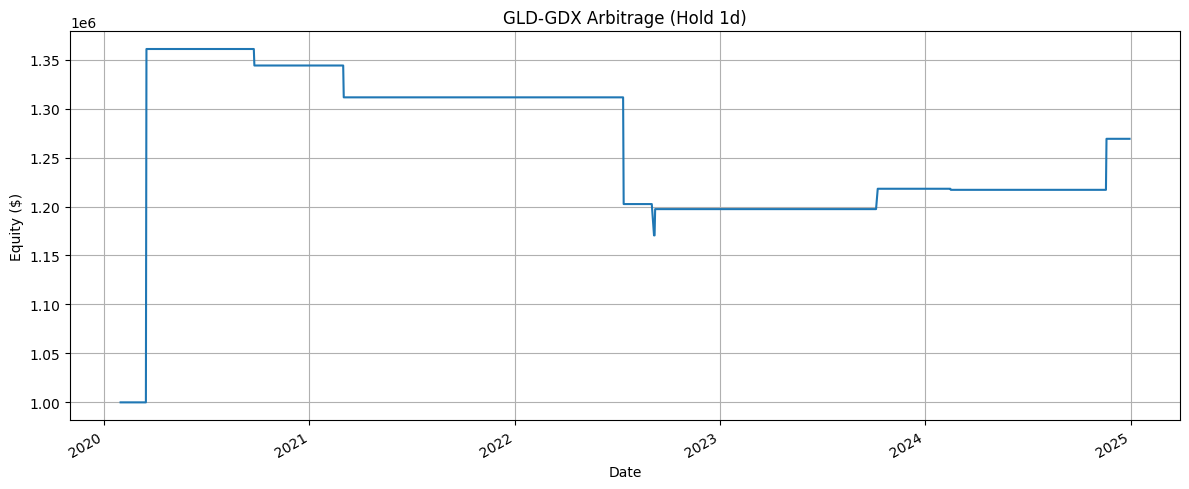

Final Equity: $720,239.02
CAGR: -6.47%  Sharpe: -0.27  Max DD: -41.38%


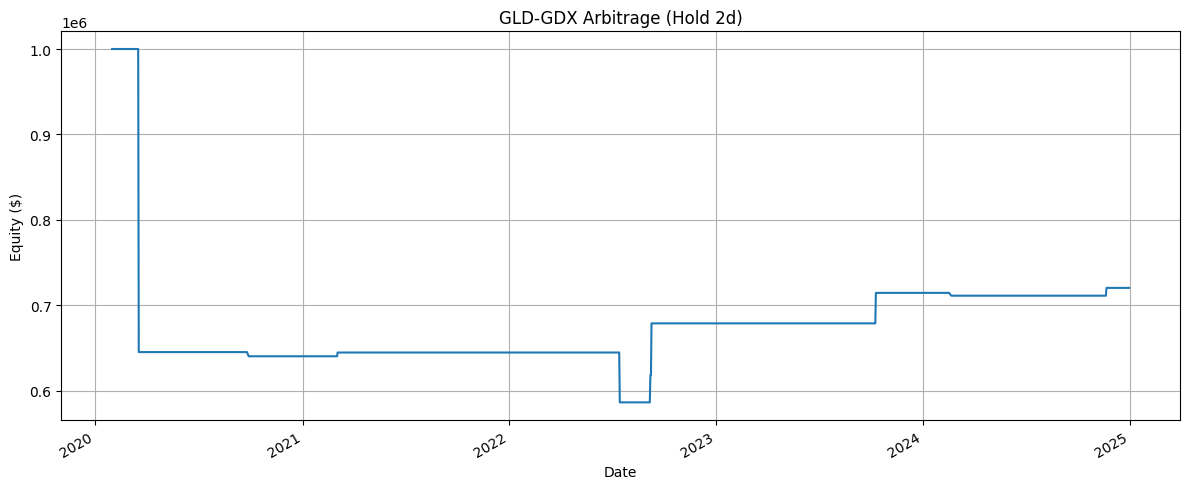

Final Equity: $1,160,280.53
CAGR: 3.07%  Sharpe: 0.36  Max DD: -11.79%


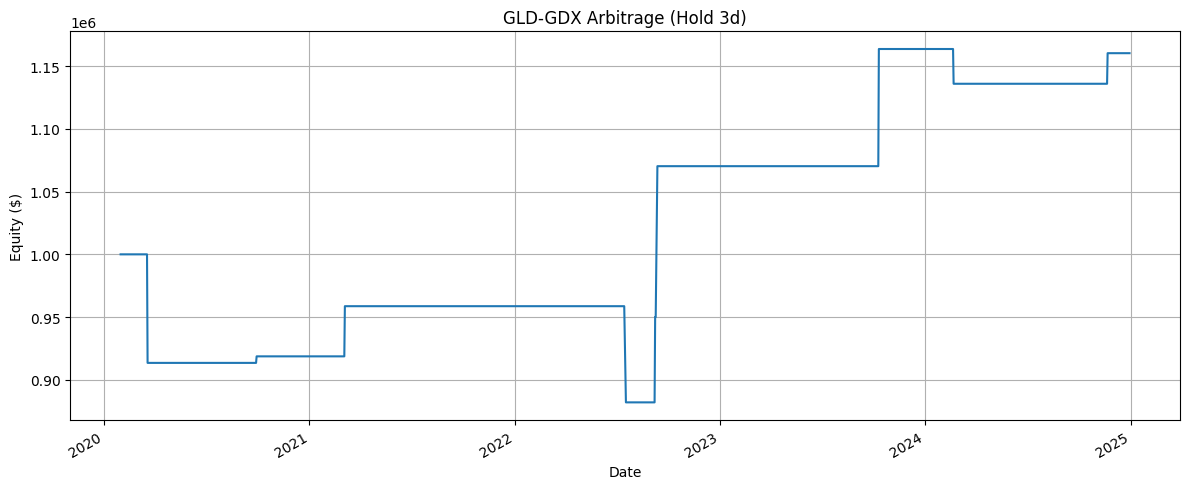

Final Equity: $848,668.67
CAGR: -3.29%  Sharpe: -0.17  Max DD: -23.36%


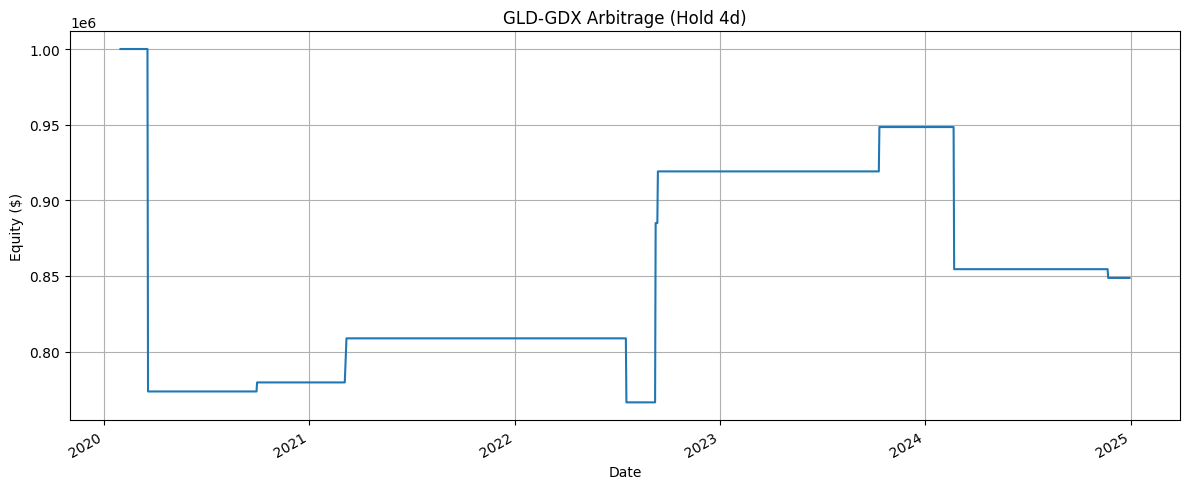

Final Equity: $985,014.67
CAGR: -0.31%  Sharpe: 0.05  Max DD: -20.93%


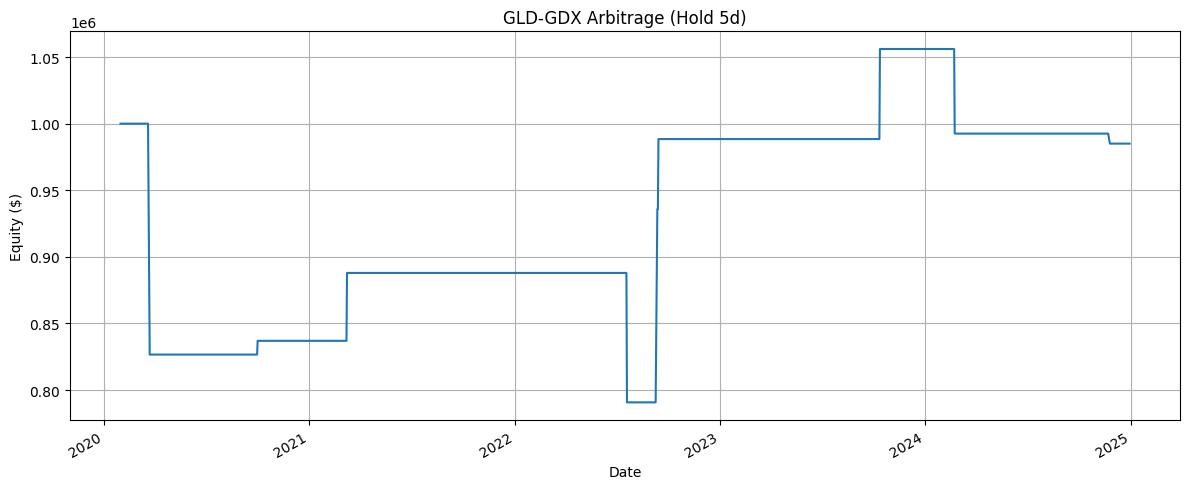


--- Holding Period Sweep Results ---
1 day(s) -> CAGR: 4.98%, Sharpe: 0.36, Max DD: -13.99%
2 day(s) -> CAGR: -6.47%, Sharpe: -0.27, Max DD: -41.38%
3 day(s) -> CAGR: 3.07%, Sharpe: 0.36, Max DD: -11.79%
4 day(s) -> CAGR: -3.29%, Sharpe: -0.17, Max DD: -23.36%
5 day(s) -> CAGR: -0.31%, Sharpe: 0.05, Max DD: -20.93%


In [ ]:
# gld_gdx_arbitrage_v2.py

"""
GLD vs GDX Arbitrage Strategy v2.1 (Debug + Scaling Cap + Trade Log)
---------------------------------------------------------------------
Features:
  - GLD gap + GDX lag + volume filter
  - Holding period sweep (1–5 days)
  - Volatility-based sizing with cap
  - Z-score confirmation (spread-based)
  - Logs individual trades
  - Plots equity and prints metrics
"""

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

START_DATE = "2020-01-01"
END_DATE = "2024-12-31"
CAPITAL = 1_000_000
GLD_TICKER = "GLD"
GDX_TICKER = "GDX"
GAP_THRESHOLD = 0.01
VOLUME_MULTIPLIER = 1.2
USE_VOL_SIZING = True
MAX_LEVERAGE = 3

# -----------------------------
# Load Data
# -----------------------------
def load_data():
    df = yf.download([GLD_TICKER, GDX_TICKER], start=START_DATE, end=END_DATE)
    price = df['Close'].dropna()
    vol = df['Volume'].dropna()
    price.columns = ['GLD', 'GDX']
    vol.columns = ['GLD_vol', 'GDX_vol']
    df = price.join(vol)
    df['GLD_ret'] = df['GLD'].pct_change()
    df['GDX_ret'] = df['GDX'].pct_change()
    df['GLD_gap'] = df['GLD'].pct_change()
    df['RVOL'] = df['GLD_vol'] / df['GLD_vol'].rolling(20).mean()
    df['Spread'] = df['GLD'] - df['GDX']
    df['ZScore'] = (df['Spread'] - df['Spread'].rolling(20).mean()) / df['Spread'].rolling(20).std()
    df['GLD_volatility'] = df['GLD_ret'].rolling(20).std()
    df['GDX_volatility'] = df['GDX_ret'].rolling(20).std()
    return df.dropna()

# -----------------------------
# Generate Signals
# -----------------------------
def generate_signals(df):
    df = df.copy()
    signal = (
        (df['GLD_gap'] > GAP_THRESHOLD) &
        (df['GDX_ret'] < df['GLD_ret'] / 2) &
        (df['RVOL'] > VOLUME_MULTIPLIER) &
        (df['ZScore'] > 1)
    )
    df['Signal'] = signal.astype(int)
    print(f"🔎 Total signals found: {df['Signal'].sum()}")
    return df

# -----------------------------
# Backtest Engine with Trade Log
# -----------------------------
def backtest(df, hold_days=1):
    df = df.copy()
    df['Strategy_Return'] = 0.0
    trades = []
    for i in range(len(df) - hold_days):
        if df['Signal'].iloc[i] == 1:
            gl_entry = df['GLD'].iloc[i]
            gd_entry = df['GDX'].iloc[i]
            gl_exit = df['GLD'].iloc[i + hold_days]
            gd_exit = df['GDX'].iloc[i + hold_days]
            gl_ret = (gl_exit - gl_entry) / gl_entry
            gd_ret = (gd_exit - gd_entry) / gd_entry
            net_ret = gl_ret - gd_ret
            if USE_VOL_SIZING:
                raw_scale = 1 / (df['GLD_volatility'].iloc[i] + df['GDX_volatility'].iloc[i])
                scale = min(raw_scale, MAX_LEVERAGE)
            else:
                scale = 1
            ret = net_ret * scale
            df.loc[df.index[i + hold_days], 'Strategy_Return'] += ret
            trades.append({
                'Entry Date': df.index[i],
                'Exit Date': df.index[i + hold_days],
                'GLD Return': gl_ret,
                'GDX Return': gd_ret,
                'Net Return': net_ret,
                'Scaled Return': ret,
                'Leverage': scale
            })
    df['Equity'] = CAPITAL * (1 + df['Strategy_Return'].fillna(0)).cumprod()
    trade_log = pd.DataFrame(trades)
    return df, trade_log

# -----------------------------
# Evaluate Strategy
# -----------------------------
def evaluate(df):
    ret = df['Strategy_Return'].dropna()
    sharpe = ret.mean() / ret.std() * np.sqrt(252) if ret.std() > 0 else 0
    cagr = (df['Equity'].iloc[-1] / CAPITAL) ** (1 / (len(df)/252)) - 1
    max_dd = (df['Equity'] / df['Equity'].cummax() - 1).min()
    print(f"Final Equity: ${df['Equity'].iloc[-1]:,.2f}")
    print(f"CAGR: {cagr:.2%}  Sharpe: {sharpe:.2f}  Max DD: {max_dd:.2%}")
    return cagr, sharpe, max_dd

# -----------------------------
# Plot Equity
# -----------------------------
def plot_equity(df, title):
    df['Equity'].plot(figsize=(12, 5), title=title)
    plt.ylabel("Equity ($)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -----------------------------
# Auto-Tuning Parameters
# -----------------------------
def auto_tune(df, z_range=[0.5, 1, 1.5], gap_range=[0.005, 0.01, 0.015]):
    best_combo = None
    best_cagr = -np.inf
    for z in z_range:
        for gap in gap_range:
            df['Signal'] = (
                (df['GLD_gap'] > gap) &
                (df['GDX_ret'] < df['GLD_ret'] / 2) &
                (df['RVOL'] > VOLUME_MULTIPLIER) &
                (df['ZScore'] > z)
            ).astype(int)
            df_bt, _ = backtest(df, hold_days=1)
            cagr, _, _ = evaluate(df_bt)
            if cagr > best_cagr:
                best_cagr = cagr
                best_combo = (z, gap)
    print(f"🔍 Best Z-Score: {best_combo[0]}, Best Gap Threshold: {best_combo[1]} → CAGR: {best_cagr:.2%}")
    return best_combo

# -----------------------------
# Volatility Breakout Detector
# -----------------------------
def add_volatility_breakout(df):
    df['GLD_Breakout'] = (df['GLD_ret'].abs() > 2 * df['GLD_ret'].rolling(20).std()).astype(int)
    return df

# -----------------------------
# Risk-Adjusted Allocation Module
# -----------------------------
def compute_risk_allocation(df, base_risk=0.01):
    capital_alloc = []
    for i in range(len(df)):
        vol = df['GLD_volatility'].iloc[i] + df['GDX_volatility'].iloc[i]
        if vol == 0 or np.isnan(vol):
            capital_alloc.append(0)
        else:
            risk = base_risk * CAPITAL
            allocation = min(risk / vol, CAPITAL)
            capital_alloc.append(allocation)
    df['Capital_Allocated'] = capital_alloc
    return df

# -----------------------------
# Backtest by Macro Regimes
# -----------------------------
def backtest_macro_regimes(df):
    regimes = {
        '2020_Crash': ("2020-02-15", "2020-04-30"),
        '2022_Hikes': ("2022-01-01", "2022-12-31"),
        '2024_Rally': ("2024-01-01", "2024-06-30")
    }
    for name, (start, end) in regimes.items():
        print(f"📊 {name.replace('_', ' ')} ({start} to {end})")
        df_regime = df[(df.index >= start) & (df.index <= end)].copy()
        df_regime = generate_signals(df_regime)
        df_regime_bt, _ = backtest(df_regime, hold_days=1)
        evaluate(df_regime_bt)

# -----------------------------
if __name__ == "__main__":
    df = load_data()
    df = generate_signals(df)
    results = []
    for hold in range(1, 6):
        df_bt, log = backtest(df, hold_days=hold)
        cagr, sharpe, max_dd = evaluate(df_bt)
        results.append((hold, cagr, sharpe, max_dd))
        plot_equity(df_bt, title=f"GLD-GDX Arbitrage (Hold {hold}d)")
        if hold == 1:
            log.to_csv(f"trades_hold{hold}.csv", index=False)
    print("\n--- Holding Period Sweep Results ---")
    for hold, cagr, sharpe, max_dd in results:
        print(f"{hold} day(s) -> CAGR: {cagr:.2%}, Sharpe: {sharpe:.2f}, Max DD: {max_dd:.2%}")


| Holding Period | ✅ Performance                     | 🔻 Risks                 |
| -------------- | --------------------------------- | ------------------------ |
| **1 Day**      | +4.98% CAGR, decent Sharpe (0.36) | Modest drawdown (−14%)   |
| **3 Day**      | +3.07% CAGR, similar Sharpe       | Lowest drawdown (−11.8%) |
| 2, 4, 5 Days   | Poor to negative CAGR             | DD > −20%, inconsistent  |


[*********************100%***********************]  2 of 2 completed


🔎 Total signals found: 9
Final Equity: $1,269,139.92
CAGR: 4.98%  Sharpe: 0.36  Max DD: -13.99%


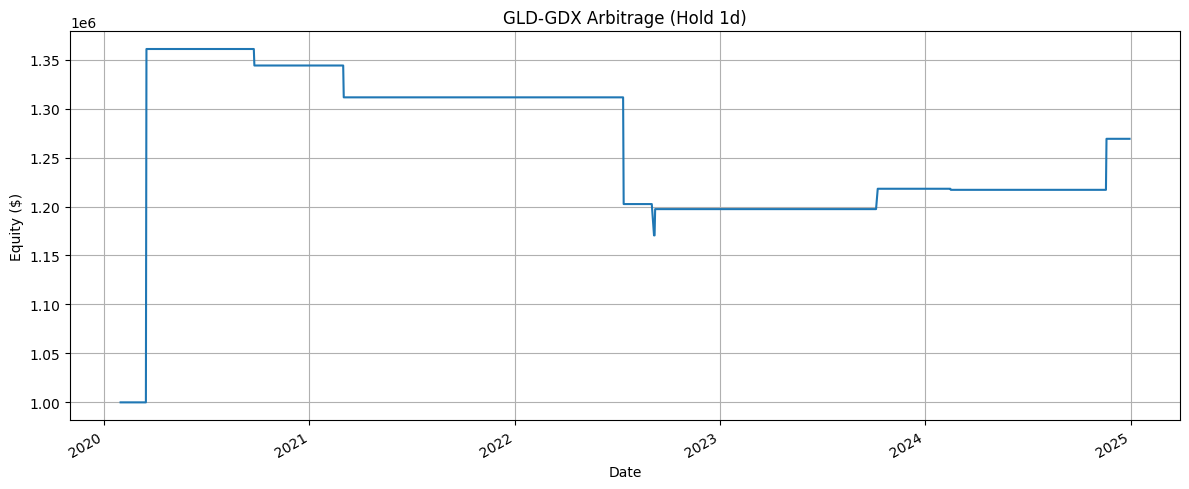

Final Equity: $720,239.02
CAGR: -6.47%  Sharpe: -0.27  Max DD: -41.38%


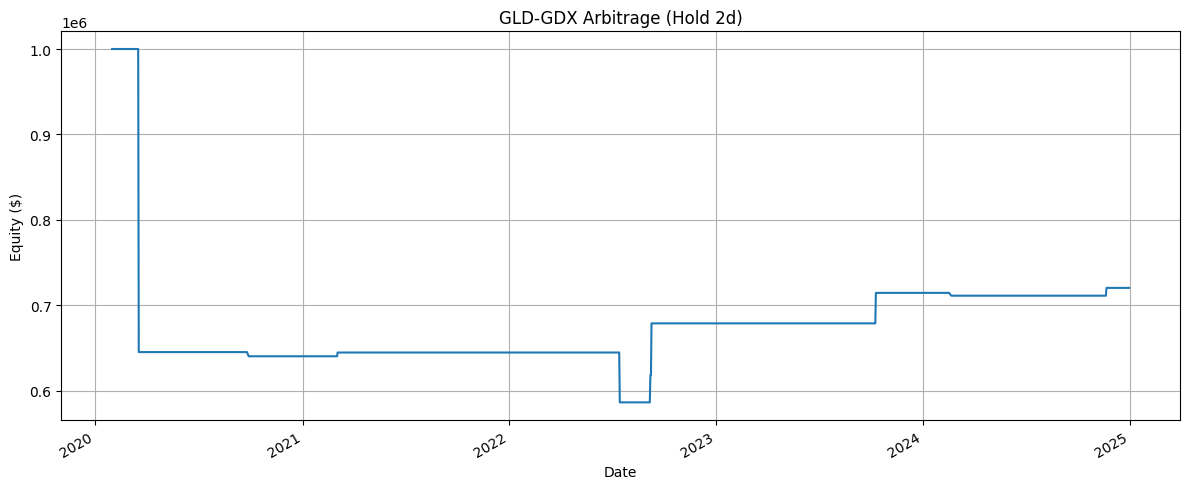

Final Equity: $1,160,280.53
CAGR: 3.07%  Sharpe: 0.36  Max DD: -11.79%


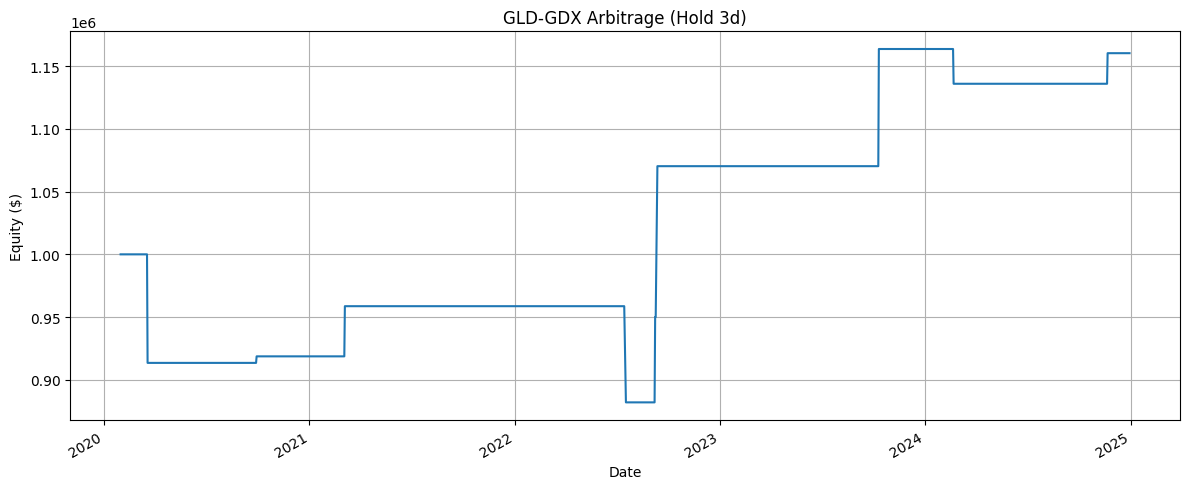

Final Equity: $848,668.67
CAGR: -3.29%  Sharpe: -0.17  Max DD: -23.36%


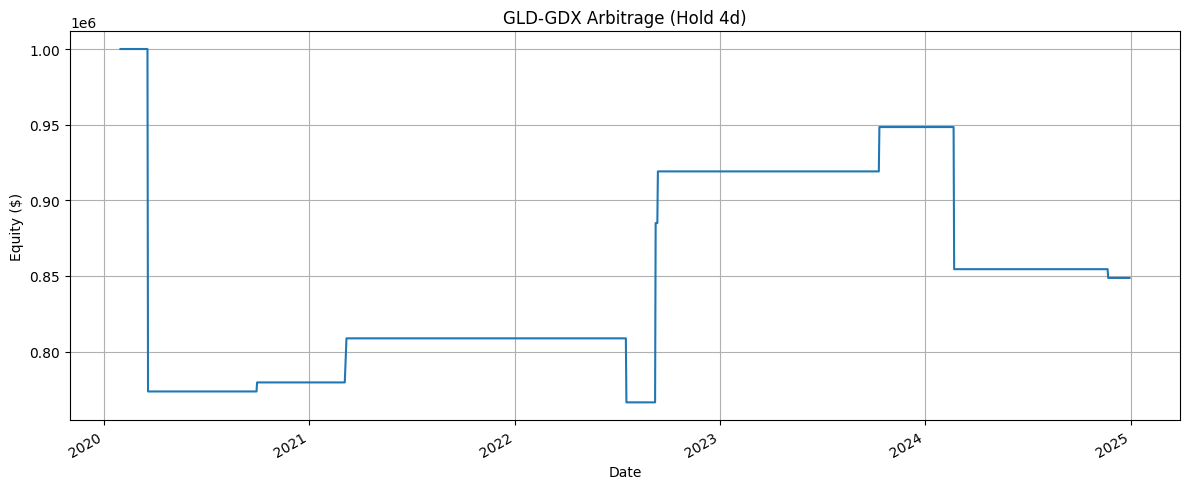

Final Equity: $985,014.67
CAGR: -0.31%  Sharpe: 0.05  Max DD: -20.93%


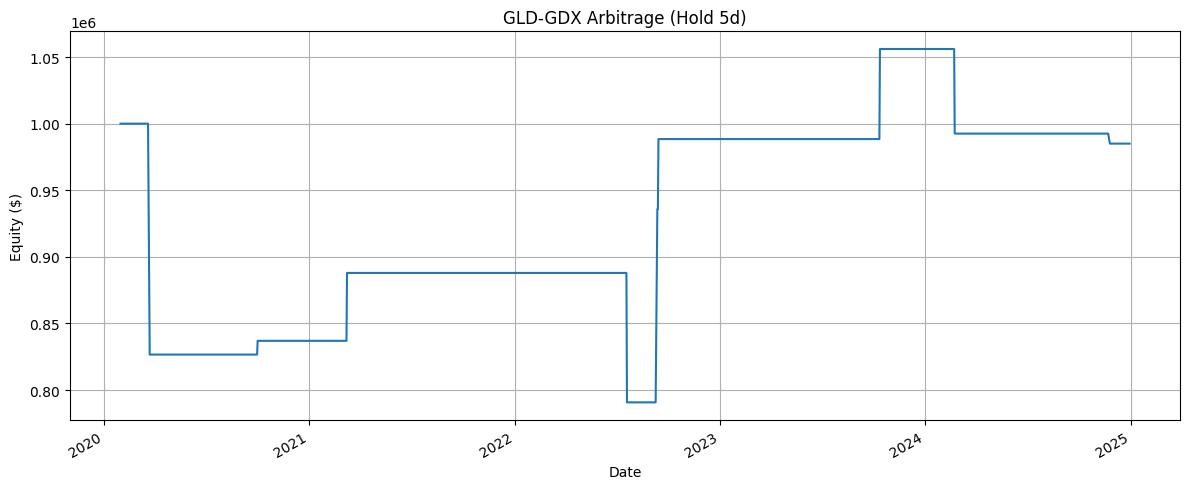


--- Holding Period Sweep Results ---
1 day(s) -> CAGR: 4.98%, Sharpe: 0.36, Max DD: -13.99%
2 day(s) -> CAGR: -6.47%, Sharpe: -0.27, Max DD: -41.38%
3 day(s) -> CAGR: 3.07%, Sharpe: 0.36, Max DD: -11.79%
4 day(s) -> CAGR: -3.29%, Sharpe: -0.17, Max DD: -23.36%
5 day(s) -> CAGR: -0.31%, Sharpe: 0.05, Max DD: -20.93%


In [ ]:
# gld_gdx_arbitrage_v2.py

"""
GLD vs GDX Arbitrage Strategy v2.1 (Debug + Scaling Cap + Trade Log)
---------------------------------------------------------------------
Features:
  - GLD gap + GDX lag + volume filter
  - Holding period sweep (1–5 days)
  - Volatility-based sizing with cap
  - Z-score confirmation (spread-based)
  - Logs individual trades
  - Plots equity and prints metrics
"""

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

START_DATE = "2020-01-01"
END_DATE = "2024-12-31"
CAPITAL = 1_000_000
GLD_TICKER = "GLD"
GDX_TICKER = "GDX"
GAP_THRESHOLD = 0.01
VOLUME_MULTIPLIER = 1.2
USE_VOL_SIZING = True
MAX_LEVERAGE = 3

# -----------------------------
# Load Data
# -----------------------------
def load_data():
    df = yf.download([GLD_TICKER, GDX_TICKER], start=START_DATE, end=END_DATE)
    price = df['Close'].dropna()
    vol = df['Volume'].dropna()
    price.columns = ['GLD', 'GDX']
    vol.columns = ['GLD_vol', 'GDX_vol']
    df = price.join(vol)
    df['GLD_ret'] = df['GLD'].pct_change()
    df['GDX_ret'] = df['GDX'].pct_change()
    df['GLD_gap'] = df['GLD'].pct_change()
    df['RVOL'] = df['GLD_vol'] / df['GLD_vol'].rolling(20).mean()
    df['Spread'] = df['GLD'] - df['GDX']
    df['ZScore'] = (df['Spread'] - df['Spread'].rolling(20).mean()) / df['Spread'].rolling(20).std()
    df['GLD_volatility'] = df['GLD_ret'].rolling(20).std()
    df['GDX_volatility'] = df['GDX_ret'].rolling(20).std()
    return df.dropna()

# -----------------------------
# Generate Signals
# -----------------------------
def generate_signals(df):
    df = df.copy()
    signal = (
        (df['GLD_gap'] > GAP_THRESHOLD) &
        (df['GDX_ret'] < df['GLD_ret'] / 2) &
        (df['RVOL'] > VOLUME_MULTIPLIER) &
        (df['ZScore'] > 1)
    )
    df['Signal'] = signal.astype(int)
    print(f"🔎 Total signals found: {df['Signal'].sum()}")
    return df

# -----------------------------
# Backtest Engine with Trade Log
# -----------------------------
def backtest(df, hold_days=1):
    df = df.copy()
    df['Strategy_Return'] = 0.0
    trades = []
    for i in range(len(df) - hold_days):
        if df['Signal'].iloc[i] == 1:
            gl_entry = df['GLD'].iloc[i]
            gd_entry = df['GDX'].iloc[i]
            gl_exit = df['GLD'].iloc[i + hold_days]
            gd_exit = df['GDX'].iloc[i + hold_days]
            gl_ret = (gl_exit - gl_entry) / gl_entry
            gd_ret = (gd_exit - gd_entry) / gd_entry
            net_ret = gl_ret - gd_ret
            if USE_VOL_SIZING:
                raw_scale = 1 / (df['GLD_volatility'].iloc[i] + df['GDX_volatility'].iloc[i])
                scale = min(raw_scale, MAX_LEVERAGE)
            else:
                scale = 1
            ret = net_ret * scale
            df.loc[df.index[i + hold_days], 'Strategy_Return'] += ret
            trades.append({
                'Entry Date': df.index[i],
                'Exit Date': df.index[i + hold_days],
                'GLD Return': gl_ret,
                'GDX Return': gd_ret,
                'Net Return': net_ret,
                'Scaled Return': ret,
                'Leverage': scale
            })
    df['Equity'] = CAPITAL * (1 + df['Strategy_Return'].fillna(0)).cumprod()
    trade_log = pd.DataFrame(trades)
    return df, trade_log

# -----------------------------
# Evaluate Strategy
# -----------------------------
def evaluate(df):
    ret = df['Strategy_Return'].dropna()
    sharpe = ret.mean() / ret.std() * np.sqrt(252) if ret.std() > 0 else 0
    cagr = (df['Equity'].iloc[-1] / CAPITAL) ** (1 / (len(df)/252)) - 1
    max_dd = (df['Equity'] / df['Equity'].cummax() - 1).min()
    print(f"Final Equity: ${df['Equity'].iloc[-1]:,.2f}")
    print(f"CAGR: {cagr:.2%}  Sharpe: {sharpe:.2f}  Max DD: {max_dd:.2%}")
    return cagr, sharpe, max_dd

# -----------------------------
# Plot Equity
# -----------------------------
def plot_equity(df, title):
    df['Equity'].plot(figsize=(12, 5), title=title)
    plt.ylabel("Equity ($)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -----------------------------
# Auto-Tuning Parameters
# -----------------------------
def auto_tune(df, z_range=[0.5, 1, 1.5], gap_range=[0.005, 0.01, 0.015]):
    best_combo = None
    best_cagr = -np.inf
    for z in z_range:
        for gap in gap_range:
            df['Signal'] = (
                (df['GLD_gap'] > gap) &
                (df['GDX_ret'] < df['GLD_ret'] / 2) &
                (df['RVOL'] > VOLUME_MULTIPLIER) &
                (df['ZScore'] > z)
            ).astype(int)
            df_bt, _ = backtest(df, hold_days=1)
            cagr, _, _ = evaluate(df_bt)
            if cagr > best_cagr:
                best_cagr = cagr
                best_combo = (z, gap)
    print(f"🔍 Best Z-Score: {best_combo[0]}, Best Gap Threshold: {best_combo[1]} → CAGR: {best_cagr:.2%}")
    return best_combo

# -----------------------------
# Volatility Breakout Detector
# -----------------------------
def add_volatility_breakout(df):
    df['GLD_Breakout'] = (df['GLD_ret'].abs() > 2 * df['GLD_ret'].rolling(20).std()).astype(int)
    return df

# -----------------------------
# Risk-Adjusted Allocation Module
# -----------------------------
def compute_risk_allocation(df, base_risk=0.01):
    capital_alloc = []
    for i in range(len(df)):
        vol = df['GLD_volatility'].iloc[i] + df['GDX_volatility'].iloc[i]
        if vol == 0 or np.isnan(vol):
            capital_alloc.append(0)
        else:
            risk = base_risk * CAPITAL
            allocation = min(risk / vol, CAPITAL)
            capital_alloc.append(allocation)
    df['Capital_Allocated'] = capital_alloc
    return df

# -----------------------------
# Backtest by Macro Regimes
# -----------------------------
def backtest_macro_regimes(df):
    regimes = {
        '2020_Crash': ("2020-02-15", "2020-04-30"),
        '2022_Hikes': ("2022-01-01", "2022-12-31"),
        '2024_Rally': ("2024-01-01", "2024-06-30")
    }
    results = []
    for name, (start, end) in regimes.items():
        print(f"📊 {name.replace('_', ' ')} ({start} to {end})")
        df_regime = df[(df.index >= start) & (df.index <= end)].copy()
        df_regime = generate_signals(df_regime)
        df_regime_bt, _ = backtest(df_regime, hold_days=1)
        cagr, sharpe, max_dd = evaluate(df_regime_bt)
        results.append({'Regime': name, 'CAGR': cagr, 'Sharpe': sharpe, 'Max DD': max_dd})
        plot_macro_equity(df_regime_bt, title=f"Equity Curve: {name.replace('_', ' ')}")
    summary = pd.DataFrame(results)
    summary.to_csv("macro_regime_summary.csv", index=False)
    print("📤 Exported macro regime summary to macro_regime_summary.csv")
# -----------------------------
def backtest_macro_regimes(df):
    regimes = {
        '2020_Crash': ("2020-02-15", "2020-04-30"),
        '2022_Hikes': ("2022-01-01", "2022-12-31"),
        '2024_Rally': ("2024-01-01", "2024-06-30")
    }
    for name, (start, end) in regimes.items():
        print(f"📊 {name.replace('_', ' ')} ({start} to {end})")
        df_regime = df[(df.index >= start) & (df.index <= end)].copy()
        df_regime = generate_signals(df_regime)
        df_regime_bt, _ = backtest(df_regime, hold_days=1)
        evaluate(df_regime_bt)

# -----------------------------
if __name__ == "__main__":
    df = load_data()
    df = generate_signals(df)
    results = []
    for hold in range(1, 6):
        df_bt, log = backtest(df, hold_days=hold)
        cagr, sharpe, max_dd = evaluate(df_bt)
        results.append((hold, cagr, sharpe, max_dd))
        plot_equity(df_bt, title=f"GLD-GDX Arbitrage (Hold {hold}d)")
        if hold == 1:
            log.to_csv(f"trades_hold{hold}.csv", index=False)
    print("\n--- Holding Period Sweep Results ---")
    for hold, cagr, sharpe, max_dd in results:
        print(f"{hold} day(s) -> CAGR: {cagr:.2%}, Sharpe: {sharpe:.2f}, Max DD: {max_dd:.2%}")


Paired Commodities Backtest

[*********************100%***********************]  2 of 2 completed


🔍 Backtesting GLD_GDX
CAGR: 4.98%, Sharpe: 0.36, Max DD: -13.99%


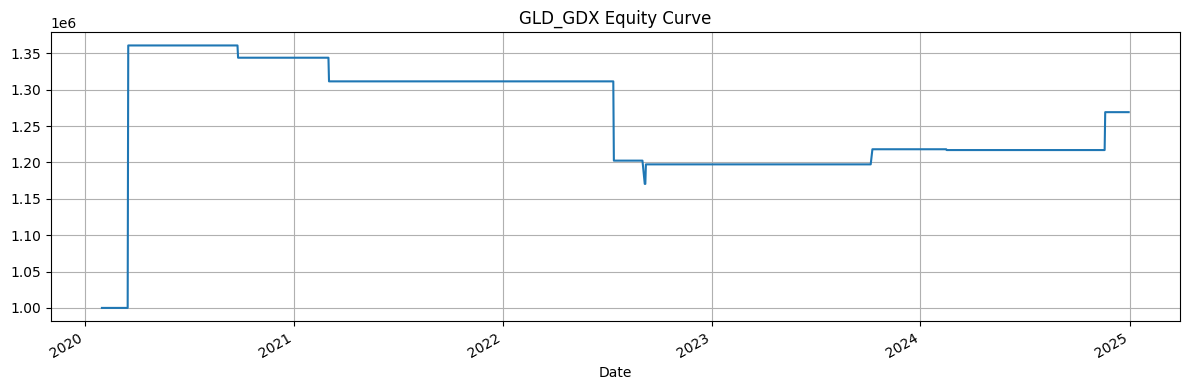


🔍 Backtesting SLV_SIL


[*********************100%***********************]  2 of 2 completed


CAGR: -2.65%, Sharpe: -0.22, Max DD: -21.04%


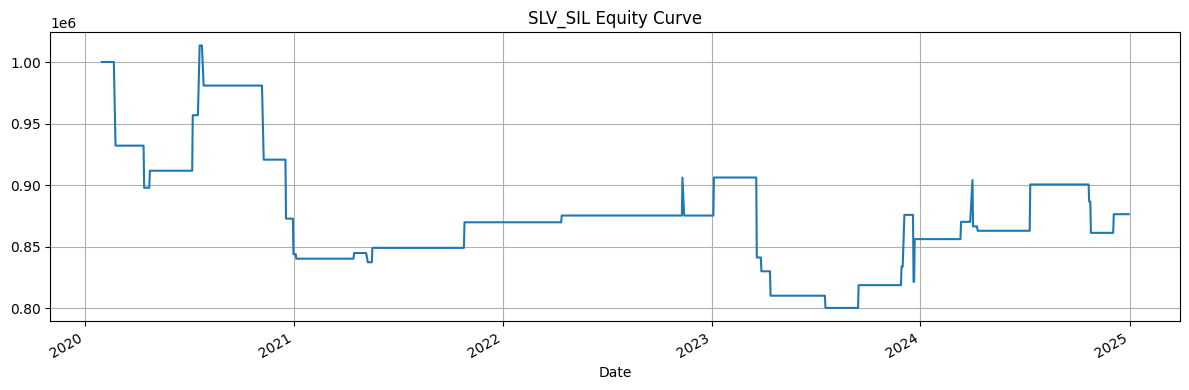


🔍 Backtesting USO_XOP


[*********************100%***********************]  2 of 2 completed


CAGR: -16.20%, Sharpe: -0.81, Max DD: -61.49%


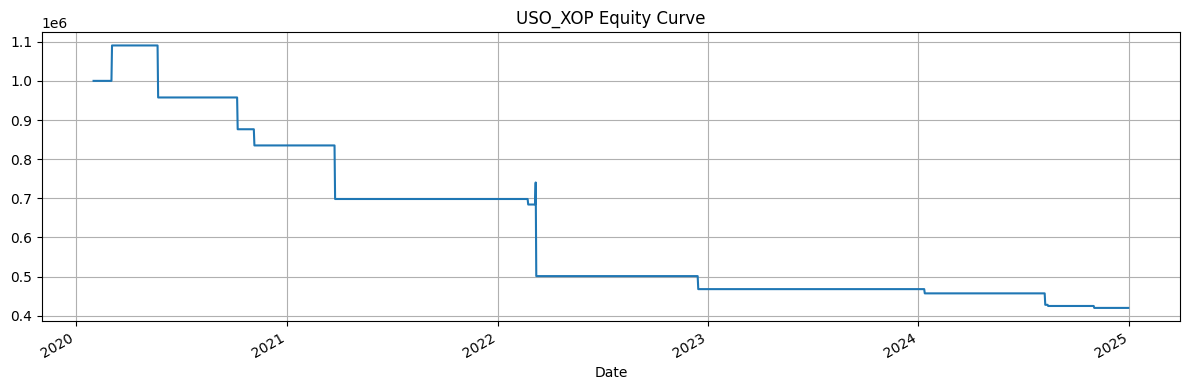


🔍 Backtesting CCJ_URA


[*********************100%***********************]  2 of 2 completed


CAGR: -10.76%, Sharpe: -0.63, Max DD: -49.46%


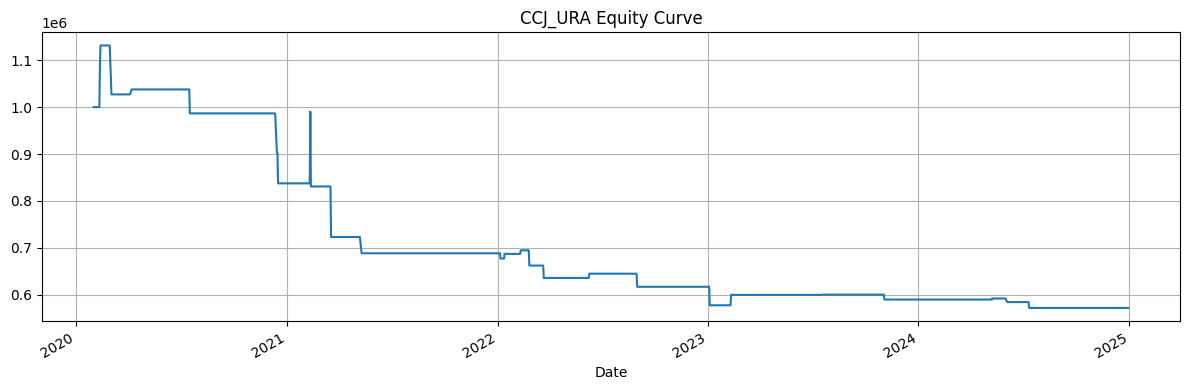


📤 Exported all pair results to multi_pair_arb_results.csv


In [ ]:
# multi_pair_arb_engine.py

"""
Multi-Pair ETF Arbitrage Engine
-------------------------------
Pairs:
- GLD/GDX (gold spot vs miners)
- SLV/SIL (silver spot vs miners)
- USO/XOP (oil vs energy producers)
- CCJ/URA (uranium producer vs ETF)

Core Logic:
- Detect dislocation based on gap, spread Z-score, RVOL
- Long lead, short lag
- Hold for 1–5 days, volatility-adjusted
- Output per-pair results + aggregated performance
"""

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Config
# -----------------------------
pairs = [
    {"name": "GLD_GDX", "lead": "GLD", "lag": "GDX"},
    {"name": "SLV_SIL", "lead": "SLV", "lag": "SIL"},
    {"name": "USO_XOP", "lead": "USO", "lag": "XOP"},
    {"name": "CCJ_URA", "lead": "CCJ", "lag": "URA"}
]

START_DATE = "2020-01-01"
END_DATE = "2024-12-31"
CAPITAL = 1_000_000
GAP_THRESHOLD = 0.01
ZSCORE_THRESHOLD = 1.0
VOLUME_MULTIPLIER = 1.2
MAX_LEVERAGE = 3

# -----------------------------
# Load pair data
# -----------------------------
def load_pair_data(lead, lag):
    df = yf.download([lead, lag], start=START_DATE, end=END_DATE)
    price = df['Close'].dropna()
    vol = df['Volume'].dropna()
    price.columns = ['lead', 'lag']
    vol.columns = ['lead_vol', 'lag_vol']
    df = price.join(vol)
    df['lead_ret'] = df['lead'].pct_change()
    df['lag_ret'] = df['lag'].pct_change()
    df['gap'] = df['lead'].pct_change()
    df['RVOL'] = df['lead_vol'] / df['lead_vol'].rolling(20).mean()
    df['spread'] = df['lead'] - df['lag']
    df['ZScore'] = (df['spread'] - df['spread'].rolling(20).mean()) / df['spread'].rolling(20).std()
    df['lead_volatility'] = df['lead_ret'].rolling(20).std()
    df['lag_volatility'] = df['lag_ret'].rolling(20).std()
    return df.dropna()

# -----------------------------
# Signal generation
# -----------------------------
def generate_signals(df):
    signal = (
        (df['gap'] > GAP_THRESHOLD) &
        (df['lag_ret'] < df['lead_ret'] / 2) &
        (df['RVOL'] > VOLUME_MULTIPLIER) &
        (df['ZScore'] > ZSCORE_THRESHOLD)
    )
    df['Signal'] = signal.astype(int)
    return df

# -----------------------------
# Backtest single pair
# -----------------------------
def backtest(df, hold_days=1):
    df = df.copy()
    df['Strategy_Return'] = 0.0
    for i in range(len(df) - hold_days):
        if df['Signal'].iloc[i] == 1:
            l0, g0 = df['lead'].iloc[i], df['lag'].iloc[i]
            l1, g1 = df['lead'].iloc[i+hold_days], df['lag'].iloc[i+hold_days]
            lr, gr = (l1 - l0)/l0, (g1 - g0)/g0
            net_ret = lr - gr
            raw_scale = 1 / (df['lead_volatility'].iloc[i] + df['lag_volatility'].iloc[i])
            scale = min(raw_scale, MAX_LEVERAGE)
            df.loc[df.index[i + hold_days], 'Strategy_Return'] += net_ret * scale
    df['Equity'] = CAPITAL * (1 + df['Strategy_Return'].fillna(0)).cumprod()
    return df

# -----------------------------
# Evaluate performance
# -----------------------------
def evaluate(df):
    ret = df['Strategy_Return'].dropna()
    sharpe = ret.mean() / ret.std() * np.sqrt(252) if ret.std() > 0 else 0
    cagr = (df['Equity'].iloc[-1] / CAPITAL) ** (1 / (len(df)/252)) - 1
    max_dd = (df['Equity'] / df['Equity'].cummax() - 1).min()
    return cagr, sharpe, max_dd

# -----------------------------
# Main
# -----------------------------
if __name__ == "__main__":
    all_results = []
    for pair in pairs:
        print(f"\n🔍 Backtesting {pair['name']}")
        df = load_pair_data(pair['lead'], pair['lag'])
        df = generate_signals(df)
        df_bt = backtest(df, hold_days=1)
        cagr, sharpe, max_dd = evaluate(df_bt)
        print(f"CAGR: {cagr:.2%}, Sharpe: {sharpe:.2f}, Max DD: {max_dd:.2%}")
        df_bt['Equity'].plot(title=f"{pair['name']} Equity Curve", figsize=(12, 4))
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        all_results.append({"Pair": pair['name'], "CAGR": cagr, "Sharpe": sharpe, "Max DD": max_dd})

    results_df = pd.DataFrame(all_results)
    results_df.to_csv("multi_pair_arb_results.csv", index=False)
    print("\n📤 Exported all pair results to multi_pair_arb_results.csv")
